## Created By:
##              Rayon Myrie
##              

## CS 636 - Data Analytics with R Programming (Summer 2020)

# Midterm project: Equity Portfolio Management
Data Preparation
Download the historial daily data of the entire 2018 for the 10 stocks

universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk. https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.
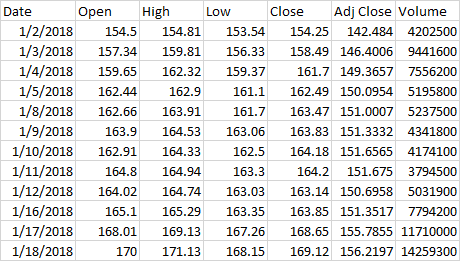

Retrieve the "Close" and "Adj Close" values for each stock
You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

## You start to manage 5 million dollars fund on Jan 02, 2018¶

You have a strategy to manage the fund.

# Data Import

In [10]:
## Import stock Market Files
IBM = read.table("IBM.csv", header=T, sep=",")
MSFT = read.table("MSFT.csv", header=T, sep=",")
GOOG = read.table("GOOG.csv", header=T, sep=",")
AAPL = read.table("AAPL.csv", header=T, sep=",")
AMZN = read.table("AMZN.csv", header=T, sep=",")
FB = read.table("FB.csv", header=T, sep=",")
NFLX=read.table("NFLX.csv", header=T, sep=",")
TSLA=read.table("TSLA.csv", header=T, sep=",")
ORCL=read.table("ORCL.csv", header=T, sep=",")
SAP=read.table("SAP.csv", header=T, sep=",")

universe= data.frame(IBM, MSFT, GOOG, AAPL, AMZN, FB, NFLX, TSLA, ORCL, SAP)
#universe
##Rename Universe Column Headings
### get Dplr package
##install.packages("dplyr") 
install.packages("dplyr") 

library(dplyr)
head(IBM)
#plot(IBM, MSFT, GOOG, AAPL, AMZN, FB, NFLX, TSLA, ORCL, SAP)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,154.50,154.81,153.54,154.25,137.5211,4202500
2018-01-03,157.34,159.81,156.33,158.49,141.3013,9441600
2018-01-04,159.65,162.32,159.37,161.70,144.1631,7556200
2018-01-05,162.44,162.90,161.10,162.49,144.8675,5195800
2018-01-08,162.66,163.91,161.70,163.47,145.7412,5237500
2018-01-09,163.90,164.53,163.06,163.83,146.0621,4341800


# Preprocessing 

In [12]:
##Check Import Worked correctly


print("----------------MSFT-------------")
head(MSFT)
names(MSFT)
str(MSFT)
print('rows/columns')
dim(MSFT)

print("----------------GOOG-------------")
head(GOOG)
names(GOOG)
str(GOOG)
print('rows/columns')
dim(GOOG)

print("----------------AAPL-------------")
head(AAPL)
names(AAPL)
str(AAPL)
print('rows/columns')
dim(AAPL)

print("----------------AMZN-------------")
head(AMZN)
names(AMZN)
str(AMZN)
print('rows/columns')
dim(AMZN)

print("------------------FB----------------")
head(FB)
names(FB)
str(FB)
print('rows/columns')
dim(FB)

print("------------------NFLX----------------")
head(NFLX)
names(NFLX)
str(NFLX)
print('rows/columns')
dim(NFLX)


print("------------------TSLA----------------")
head(TSLA)
names(TSLA)
str(TSLA)
print('rows/columns')
dim(TSLA)

print("------------------ORCL----------------")
head(ORCL)
names(ORCL)
str(ORCL)
print('rows/columns')
dim(ORCL)

print("------------------SAP----------------")
head(SAP)
names(SAP)
str(SAP)
print('rows/columns')
dim(SAP)
###End of checks

[1] "----------------MSFT-------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,86.13,86.31,85.50,85.95,82.79900,22483800
2018-01-03,86.06,86.51,85.97,86.35,83.18433,26061400
2018-01-04,86.59,87.66,86.57,87.11,83.91647,21912000
2018-01-05,87.66,88.41,87.43,88.19,84.95689,23407100
2018-01-08,88.20,88.58,87.60,88.28,85.04357,22113000
2018-01-09,88.65,88.73,87.86,88.22,84.98579,19484300


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  86.1 86.1 86.6 87.7 88.2 ...
 $ High     : num  86.3 86.5 87.7 88.4 88.6 ...
 $ Low      : num  85.5 86 86.6 87.4 87.6 ...
 $ Close    : num  85.9 86.3 87.1 88.2 88.3 ...
 $ Adj.Close: num  82.8 83.2 83.9 85 85 ...
 $ Volume   : int  22483800 26061400 21912000 23407100 22113000 19484300 18652200 17808900 24271500 36599700 ...
[1] "rows/columns"


[1] 250   7

[1] "----------------GOOG-------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,1048.34,1066.94,1045.230,1065.00,1065.00,1237600
2018-01-03,1064.31,1086.29,1063.210,1082.48,1082.48,1430200
2018-01-04,1088.00,1093.57,1084.002,1086.40,1086.40,1004600
2018-01-05,1094.00,1104.25,1092.000,1102.23,1102.23,1279100
2018-01-08,1102.23,1111.27,1101.620,1106.94,1106.94,1047600
2018-01-09,1109.40,1110.57,1101.231,1106.26,1106.26,902500


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  1048 1064 1088 1094 1102 ...
 $ High     : num  1067 1086 1094 1104 1111 ...
 $ Low      : num  1045 1063 1084 1092 1102 ...
 $ Close    : num  1065 1082 1086 1102 1107 ...
 $ Adj.Close: num  1065 1082 1086 1102 1107 ...
 $ Volume   : int  1237600 1430200 1004600 1279100 1047600 902500 1042800 978300 1720500 1575300 ...
[1] "rows/columns"


[1] 250   7

[1] "----------------AAPL-------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,170.16,172.30,169.26,172.26,166.3537,25555900
2018-01-03,172.53,174.55,171.96,172.23,166.3247,29517900
2018-01-04,172.54,173.47,172.08,173.03,167.0973,22434600
2018-01-05,173.44,175.37,173.05,175.00,168.9997,23660000
2018-01-08,174.35,175.61,173.93,174.35,168.3720,20567800
2018-01-09,174.55,175.06,173.41,174.33,168.3527,21584000


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  170 173 173 173 174 ...
 $ High     : num  172 175 173 175 176 ...
 $ Low      : num  169 172 172 173 174 ...
 $ Close    : num  172 172 173 175 174 ...
 $ Adj.Close: num  166 166 167 169 168 ...
 $ Volume   : int  25555900 29517900 22434600 23660000 20567800 21584000 23959900 18667700 25418100 29565900 ...
[1] "rows/columns"


[1] 250   7

[1] "----------------AMZN-------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500
2018-01-09,1256.90,1259.33,1241.76,1252.70,1252.70,3661300


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  1172 1188 1205 1218 1236 ...
 $ High     : num  1190 1205 1216 1229 1253 ...
 $ Low      : num  1171 1188 1205 1210 1232 ...
 $ Close    : num  1189 1204 1210 1229 1247 ...
 $ Adj.Close: num  1189 1204 1210 1229 1247 ...
 $ Volume   : int  2694500 3108800 3022100 3544700 4279500 3661300 2686000 3125000 5443700 7220700 ...
[1] "rows/columns"


[1] 250   7

[1] "------------------FB----------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,177.68,181.58,177.55,181.42,181.42,18151900
2018-01-03,181.88,184.78,181.33,184.67,184.67,16886600
2018-01-04,184.90,186.21,184.10,184.33,184.33,13880900
2018-01-05,185.59,186.90,184.93,186.85,186.85,13574500
2018-01-08,187.20,188.90,186.33,188.28,188.28,17994700
2018-01-09,188.70,188.80,187.10,187.87,187.87,12393100


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  178 182 185 186 187 ...
 $ High     : num  182 185 186 187 189 ...
 $ Low      : num  178 181 184 185 186 ...
 $ Close    : num  181 185 184 187 188 ...
 $ Adj.Close: num  181 185 184 187 188 ...
 $ Volume   : int  18151900 16886600 13880900 13574500 17994700 12393100 10529900 9588600 77551300 36183800 ...
[1] "rows/columns"


[1] 250   7

[1] "------------------NFLX----------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,196.10,201.65,195.42,201.07,201.07,10966900
2018-01-03,202.05,206.21,201.50,205.05,205.05,8591400
2018-01-04,206.20,207.05,204.00,205.63,205.63,6029600
2018-01-05,207.25,210.02,205.59,209.99,209.99,7033200
2018-01-08,210.02,212.50,208.44,212.05,212.05,5580200
2018-01-09,212.11,212.98,208.59,209.31,209.31,6125900


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  196 202 206 207 210 ...
 $ High     : num  202 206 207 210 212 ...
 $ Low      : num  195 202 204 206 208 ...
 $ Close    : num  201 205 206 210 212 ...
 $ Adj.Close: num  201 205 206 210 212 ...
 $ Volume   : int  10966900 8591400 6029600 7033200 5580200 6125900 5951500 7659500 8199400 13516100 ...
[1] "rows/columns"


[1] 250   7

[1] "------------------TSLA----------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,312.00,322.11,311.00,320.53,320.53,4352200
2018-01-03,321.00,325.25,315.55,317.25,317.25,4521500
2018-01-04,312.87,318.55,305.68,314.62,314.62,9946300
2018-01-05,316.62,317.24,312.00,316.58,316.58,4591200
2018-01-08,316.00,337.02,315.50,336.41,336.41,9859400
2018-01-09,335.16,338.80,327.40,333.69,333.69,7146600


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  312 321 313 317 316 ...
 $ High     : num  322 325 319 317 337 ...
 $ Low      : num  311 316 306 312 316 ...
 $ Close    : num  321 317 315 317 336 ...
 $ Adj.Close: num  321 317 315 317 336 ...
 $ Volume   : int  4352200 4521500 9946300 4591200 9859400 7146600 4309900 6645500 4825100 6474300 ...
[1] "rows/columns"


[1] 250   7

[1] "------------------ORCL----------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,47.57,47.80,46.17,46.63,44.71024,25380000
2018-01-03,47.53,48.07,47.44,47.71,45.74577,24165000
2018-01-04,47.99,48.19,47.72,48.18,46.19643,19815100
2018-01-05,48.42,48.63,48.28,48.47,46.47449,14496400
2018-01-08,48.30,49.07,47.94,48.98,46.96349,15075000
2018-01-09,49.25,49.36,48.92,49.06,47.22339,14153700


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  47.6 47.5 48 48.4 48.3 ...
 $ High     : num  47.8 48.1 48.2 48.6 49.1 ...
 $ Low      : num  46.2 47.4 47.7 48.3 47.9 ...
 $ Close    : num  46.6 47.7 48.2 48.5 49 ...
 $ Adj.Close: num  44.7 45.7 46.2 46.5 47 ...
 $ Volume   : int  25380000 24165000 19815100 14496400 15075000 14153700 13476600 11687800 15978200 17152600 ...
[1] "rows/columns"


[1] 250   7

[1] "------------------SAP----------------"


Date,Open,High,Low,Close,Adj.Close,Volume
2018-01-02,111.23,112.42,111.13,112.39,107.6336,540600
2018-01-03,112.63,113.69,112.55,113.31,108.5147,506200
2018-01-04,114.78,115.30,114.70,115.05,110.1811,539300
2018-01-05,115.45,116.50,115.36,116.33,111.4069,475300
2018-01-08,115.09,115.42,114.76,114.80,109.9416,515400
2018-01-09,114.36,114.46,113.45,114.16,109.3287,515900


[1] "Date"      "Open"      "High"      "Low"       "Close"     "Adj.Close"
[7] "Volume"

'data.frame':	250 obs. of  7 variables:
 $ Date     : Factor w/ 250 levels "2018-01-02","2018-01-03",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  111 113 115 115 115 ...
 $ High     : num  112 114 115 116 115 ...
 $ Low      : num  111 113 115 115 115 ...
 $ Close    : num  112 113 115 116 115 ...
 $ Adj.Close: num  108 109 110 111 110 ...
 $ Volume   : int  540600 506200 539300 475300 515400 515900 705800 2291200 1603200 927200 ...
[1] "rows/columns"


[1] 250   7

In [13]:
############ Data Pre-processing #######
######Reduce columns to only data and Adj; Then join tables

IBM_Reduced=select(IBM,Date,Close,Adj.Close)
#IBM_Reduced
MSFT_Reduced=select(MSFT,Date,Close,Adj.Close)
#MSFT_Reduced
GOOG_Reduced=select(GOOG,Date,Close,Adj.Close)
AAPL_Reduced=select(AAPL,Date,Close,Adj.Close)
AMZN_Reduced=select(AMZN,Date,Close,Adj.Close)
FB_Reduced=select(FB,Date,Close,Adj.Close)
NFLX_Reduced=select(NFLX,Date,Close,Adj.Close)
TSLA_Reduced=select(TSLA,Date,Close,Adj.Close)
ORCL_Reduced=select(ORCL,Date,Close,Adj.Close)
SAP_Reduced=select(SAP,Date,Adj.Close, Close)
#############################################################

Universe_closings = inner_join(IBM_Reduced, MSFT_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, GOOG_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, AAPL_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, AMZN_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, FB_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, NFLX_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, TSLA_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, ORCL_Reduced , by='Date')
Universe_closings = inner_join(Universe_closings, SAP_Reduced , by='Date')

##check row count
n=nrow(Universe_closings)
n
#rename columns
names(Universe_closings)=c("DATE", 'IBM_Close','IBM_ADJ_Close',
                  'MSFT_Close','MSFT_ADJ_Close',
                  'GOOG_Close','GOOG_ADJ_Close',
                  'AAPL_Close', 'AAPL_ADJ_Close',
                   'AMZN_Close','AMZN_ADJ_Close',
                    'FB_Close', 'FB_ADJ_Close',
                  'NFLX_Close', 'NFLX_ADJ_Close',
                  'TSLA_Close', 'TSLA_ADJ_Close',
                  'ORCL_Close', 'ORCL_ADJ_Close',
                  'SAP_Close', 'SAP_ADJ_Close'
                 )


head(Universe_closings)


[1] 250

DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
2018-01-03,158.49,141.3013,86.35,83.18433,1082.48,1082.48,172.23,166.3247,1204.20,...,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.74577,108.5147,113.31
2018-01-04,161.70,144.1631,87.11,83.91647,1086.40,1086.40,173.03,167.0973,1209.59,...,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.19643,110.1811,115.05
2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,111.4069,116.33
2018-01-08,163.47,145.7412,88.28,85.04357,1106.94,1106.94,174.35,168.3720,1246.87,...,188.28,188.28,212.05,212.05,336.41,336.41,48.98,46.96349,109.9416,114.80
2018-01-09,163.83,146.0621,88.22,84.98579,1106.26,1106.26,174.33,168.3527,1252.70,...,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.22339,109.3287,114.16


# Strategy #1



On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \\$154.25. With \\$1m, you can buy max 6482 shares with cost \\$999848.5 with \\$151.5‬ cash left. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


In [220]:
### Parameter Variables
OpeningBalance =5000000.00
no_fund_inv=5
MTM_filter_DT ="2018-01-02"
#### 
Start1 = OpeningBalance/no_fund_inv
Start2= OpeningBalance/no_fund_inv
Start3= OpeningBalance/no_fund_inv
Start4= OpeningBalance/no_fund_inv
Start5= OpeningBalance/no_fund_inv

MTM = filter(Universe_closings,(DATE==MTM_filter_DT))
MTM
##IBM_MTM_wdgt
#MSFT_shares
#GOOG_shares
#AAPL_shares
#AMZN_shares
library(tidyr)
Portfolio=rbind(MTM %>%
          transmute(STOCK="IBM",
                    Purchase_date=DATE,
             Close=IBM_Close,
             No_of_Shares= floor(Start1/IBM_Close),
             Cost = No_of_Shares * IBM_Close,
             Zero_Int_Cash=Start1-Cost,
             MTM=format(Cost+Zero_Int_Cash,scientific=9
             
                       )
            ),
           MTM %>%
             transmute(STOCK="MSFT",
                       Purchase_date=DATE,
             Close=MSFT_Close,
             No_of_Shares= floor(Start2/MSFT_Close),
             Cost = No_of_Shares * MSFT_Close,
             Zero_Int_Cash=Start2-Cost,
             MTM=format(Cost+Zero_Int_Cash,scientific=9
                       )
            ),MTM %>%
             transmute(STOCK="GOOG",
                       Purchase_date=DATE,
             Close=GOOG_Close,
             No_of_Shares= floor(Start3/GOOG_Close),
             Cost = No_of_Shares * GOOG_Close,
             Zero_Int_Cash=Start3-Cost,
             MTM=format(Cost+Zero_Int_Cash,scientific=9)
            ),
            MTM %>%
             transmute(STOCK="AAPL",
                       Purchase_date=DATE,
             Close=AAPL_Close,
             No_of_Shares= floor(Start4/AAPL_Close),
             Cost = No_of_Shares * AAPL_Close,
             Zero_Int_Cash=Start4-Cost,
             MTM=format(Cost+Zero_Int_Cash,scientific=9)
            ),
            MTM %>%
             transmute(STOCK="AMZN",
                       Purchase_date=DATE,
             Close=AMZN_Close,
             No_of_Shares= floor(Start5/AMZN_Close),
             Cost = No_of_Shares * AMZN_Close,
             Zero_Int_Cash=Start5-Cost,
             MTM=format(Cost+Zero_Int_Cash,scientific=9)
            )
           )
MTM_Balance=unique(Portfolio %>%
  transmute("Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2)
           ))

print("------- Portfolio  -------")
Portfolio
print("------- Opening Balance  -------")
MTM_Balance


DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-02,154.25,137.5211,85.95,82.799,1065,1065,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39


[1] "------- Portfolio  -------"


STOCK,Purchase_date,Close,No_of_Shares,Cost,Zero_Int_Cash,MTM
IBM,2018-01-02,154.25,6482,999848.5,151.50000,1000000
MSFT,2018-01-02,85.95,11634,999942.3,57.73490,1000000
GOOG,2018-01-02,1065.00,938,998970.0,1030.00000,1000000
AAPL,2018-01-02,172.26,5805,999969.3,30.72903,1000000
AMZN,2018-01-02,1189.01,841,999957.4,42.58159,1000000


[1] "------- Opening Balance  -------"


Total Stock Investments,Total Cash available for trading,Total MTM
4998687,1312.546,5000000


## Strategy 2
Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

#Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

In [16]:
#Create Table with Trading day intervals that joins with Universe close
# SELL all holding in Portfolio at the closing price that day(rebalance_day)
# Purchase new Stock with lowest change

rebalance_day="2018-01-09"
dayInterval = 5  #Tweakable value for how often you want to update the portfolio
tradingDays = Universe_closings[seq(1,length(universe[,1]),dayInterval),]
#head(tradingDays)

print('ADJ Changes Table')
ADJ_Change=tradingDays%>%
            mutate(IBM_Adj_Close_Chg=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2))%>%
            mutate(MSFT_Adj_Close_Chg=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2))%>%
            mutate(GOOG_Adj_Close_Chg=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2))%>%
            mutate(AAPL_Adj_Close_Chg=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2))%>%
            mutate(AMZN_Adj_Close_Chg=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2))%>%
            mutate(FB_Adj_Close_Chg=round(FB_ADJ_Close/lag(FB_ADJ_Close),2))%>%
            mutate(NFLX_Adj_Close_Chg=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2))%>%
            mutate(TSLA_Adj_Close_Chg=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2))%>%
            mutate(ORCL_Adj_Close_Chg=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2))%>%
            mutate(SAP_Adj_Close_Chg=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2))%>%
            select(DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,
                   AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,
                   NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,
                   SAP_Adj_Close_Chg
                  )
#head(ADJ_Changes)    

###Get Stocks with the lowest ADJ % change
ADJ_Changes=filter(ADJ_Change,(DATE==rebalance_day))

ADJ_Changes
## transpose rows with with Value
Change_table=rbind(ADJ_Changes %>%
          transmute(STOCK="IBM",
          Percent_Change=ADJ_Changes[1,2]),
          ADJ_Changes %>%
          transmute(STOCK="MSFT",        
          Percent_Change=ADJ_Changes[1,3]),
           ADJ_Changes %>%
          transmute(STOCK="GOOG",        
          Percent_Change=ADJ_Changes[1,4]), 
            ADJ_Changes %>%
          transmute(STOCK="AAPL",        
          Percent_Change=ADJ_Changes[1,5]),
          ADJ_Changes %>%
          transmute(STOCK="AMZN",        
          Percent_Change=ADJ_Changes[1,6]),
          ADJ_Changes %>%
          transmute(STOCK="FB",        
          Percent_Change=ADJ_Changes[1,7]),  
          ADJ_Changes %>%
          transmute(STOCK="NFLX",        
          Percent_Change=ADJ_Changes[1,8]),
          ADJ_Changes %>%
          transmute(STOCK="TSLA",        
          Percent_Change=ADJ_Changes[1,9]) ,
          ADJ_Changes %>%
          transmute(STOCK="ORCL",        
          Percent_Change=ADJ_Changes[1,10]) ,
          ADJ_Changes %>%
          transmute(STOCK="SAP",        
          Percent_Change=ADJ_Changes[1,11]) 
                   )

Change_table=Change_table[order(Change_table$Percent_Change),]

### Sell stocks in Current Portfolio
#Portfolio

getsell = filter(Universe_closings,(DATE==rebalance_day))
print("---Rebalance Date Stock Prices---")
getsell
##create as a function
Sell_val_stock1 = switch(Portfolio[1,1],
                         "IBM"= Portfolio[1,3]*getsell[1,2]  ## Shares * Closing value
                         ,"MSFT"=Portfolio[1,3]*getsell[1,4]
                         ,"GOOG"=Portfolio[1,3]*getsell[1,6]
                         ,"AAPL"=Portfolio[1,3]*getsell[1,8]
                         ,"AMZN"=Portfolio[1,3]*getsell[1,10]
                         ,"FB"=Portfolio[1,3]*getsell[1,12] 
                         ,"NFLX"=Portfolio[1,3]*getsell[1,14]
                         ,"TSLA"=Portfolio[1,3]*getsell[1,16]
                         ,"ORCL"=Portfolio[1,3]*getsell[1,18]
                         ,"SAP" =Portfolio[1,3]*getsell[1,20]
                         )

Sell_val_stock2= switch(Portfolio[2,1],
                       "IBM"= Portfolio[2,3]*getsell[1,2] 
                         ,"MSFT"=Portfolio[2,3]*getsell[1,4]
                         ,"GOOG"=Portfolio[2,3]*getsell[1,6]
                         ,"AAPL"=Portfolio[2,3]*getsell[1,8]
                         ,"AMZN"=Portfolio[2,3]*getsell[1,10]
                         ,"FB"=Portfolio[2,3]*getsell[1,12] 
                         ,"NFLX"=Portfolio[2,3]*getsell[1,14]
                         ,"TSLA"=Portfolio[2,3]*getsell[1,16]
                         ,"ORCL"=Portfolio[2,3]*getsell[1,18]
                         ,"SAP" =Portfolio[2,3]*getsell[1,20] 
                       )
Sell_val_stock3= switch(Portfolio[3,1],
                       "IBM"= Portfolio[3,3]*getsell[1,2] 
                         ,"MSFT"=Portfolio[3,3]*getsell[1,4]
                         ,"GOOG"=Portfolio[3,3]*getsell[1,6]
                         ,"AAPL"=Portfolio[3,3]*getsell[1,8]
                         ,"AMZN"=Portfolio[3,3]*getsell[1,10]
                         ,"FB"=Portfolio[3,3]*getsell[1,12] 
                         ,"NFLX"=Portfolio[3,3]*getsell[1,14]
                         ,"TSLA"=Portfolio[3,3]*getsell[1,16]
                         ,"ORCL"=Portfolio[3,3]*getsell[1,18]
                         ,"SAP" =Portfolio[3,3]*getsell[1,20] 
                       )
Sell_val_stock4= switch(Portfolio[4,1],
                       "IBM"= Portfolio[4,3]*getsell[1,2] 
                         ,"MSFT"=Portfolio[4,3]*getsell[1,4]
                         ,"GOOG"=Portfolio[4,3]*getsell[1,6]
                         ,"AAPL"=Portfolio[4,3]*getsell[1,8]
                         ,"AMZN"=Portfolio[4,3]*getsell[1,10]
                         ,"FB"=Portfolio[4,3]*getsell[1,12] 
                         ,"NFLX"=Portfolio[4,3]*getsell[1,14]
                         ,"TSLA"=Portfolio[4,3]*getsell[1,16]
                         ,"ORCL"=Portfolio[4,3]*getsell[1,18]
                         ,"SAP" =Portfolio[4,3]*getsell[1,20] 
                       )
Sell_val_stock5= switch(Portfolio[5,1],
                       "IBM"= Portfolio[5,3]*getsell[1,2] 
                         ,"MSFT"=Portfolio[5,3]*getsell[1,4]
                         ,"GOOG"=Portfolio[5,3]*getsell[1,6]
                         ,"AAPL"=Portfolio[5,3]*getsell[1,8]
                         ,"AMZN"=Portfolio[5,3]*getsell[1,10]
                         ,"FB"=Portfolio[5,3]*getsell[1,12] 
                         ,"NFLX"=Portfolio[5,3]*getsell[1,14]
                         ,"TSLA"=Portfolio[5,3]*getsell[1,16]
                         ,"ORCL"=Portfolio[5,3]*getsell[1,18]
                         ,"SAP" =Portfolio[5,3]*getsell[1,20] 
                       )
print("opening cash")
MTM_Balance[1,2]

print ("-----Sales Report----")
sales_Portfolio=rbind(getsell %>%
                    transmute(STOCK=Portfolio[1,1],
                   Shares_Sold= Sell_val_stock1),
                      getsell %>%
                      transmute(STOCK=Portfolio[2,1],
                   Shares_Sold= Sell_val_stock2),
                      getsell %>%
                      transmute(STOCK=Portfolio[3,1],
                   Shares_Sold= Sell_val_stock3),
                      getsell %>%
                      transmute(STOCK=Portfolio[4,1],
                   Shares_Sold= Sell_val_stock4),
                      getsell %>%
                      transmute(STOCK=Portfolio[5,1],
                   Shares_Sold= Sell_val_stock5)
                     )
sales_Portfolio

print("New Cash Balance")
NCB = round(Sell_val_stock1
            +Sell_val_stock2
            +Sell_val_stock3
            + Sell_val_stock4
            +Sell_val_stock5
             +MTM_Balance[1,2],2)

NCB
### Split cash into 5 buckets
print("Split cash in 5 to buy new stocks")
N_Start1 = NCB/no_fund_inv
N_Start2= NCB/no_fund_inv
N_Start3= NCB/no_fund_inv
N_Start4= NCB/no_fund_inv
N_Start5= NCB/no_fund_inv
N_Start5

###Buy New 5 Stocks as of new rebalance date
### get the 5 stocks from change table with the lowest %
print('Buy New Stocks')
Change_table=head(Change_table,5) 
Change_table
#### uses new cash balance to but new stocks
Buy_stock1 = switch(Change_table[1,1],
                    "IBM"= floor(N_Start1/getsell[1,2])
                    ,"MSFT"=floor(N_Start1/getsell[1,4])
                    ,"GOOG"=floor(N_Start1/getsell[1,6])
                    ,"AAPL"=floor(N_Start1/getsell[1,8])
                    ,"AMZN"=floor(N_Start1/getsell[1,10])
                    ,"FB"=floor(N_Start1/getsell[1,12])
                    ,"NFLX"=floor(N_Start1/getsell[1,14])
                    ,"TSLA"=floor(N_Start1/getsell[1,16])
                    ,"ORCL"=floor(N_Start1/getsell[1,18])
                    ,"SAP" =floor(N_Start1/getsell[1,20])
                   )


Buy_stock2 = switch(Change_table[2,1],
                    "IBM"= floor(N_Start2/getsell[1,2])
                    ,"MSFT"=floor(N_Start2/getsell[1,4])
                    ,"GOOG"=floor(N_Start2/getsell[1,6])
                    ,"AAPL"=floor(N_Start2/getsell[1,8])
                    ,"AMZN"=floor(N_Start2/getsell[1,10])
                    ,"FB"=floor(N_Start2/getsell[1,12])
                    ,"NFLX"=floor(N_Start2/getsell[1,14])
                    ,"TSLA"=floor(N_Start2/getsell[1,16])
                    ,"ORCL"=floor(N_Start2/getsell[1,18])
                    ,"SAP" =floor(N_Start2/getsell[1,20])
                   )
Buy_stock3 = switch(Change_table[3,1],
                    "IBM"= floor(N_Start3/getsell[1,2])
                    ,"MSFT"=floor(N_Start3/getsell[1,4])
                    ,"GOOG"=floor(N_Start3/getsell[1,6])
                    ,"AAPL"=floor(N_Start3/getsell[1,8])
                    ,"AMZN"=floor(N_Start3/getsell[1,10])
                    ,"FB"=floor(N_Start3/getsell[1,12])
                    ,"NFLX"=floor(N_Start3/getsell[1,14])
                    ,"TSLA"=floor(N_Start3/getsell[1,16])
                    ,"ORCL"=floor(N_Start3/getsell[1,18])
                    ,"SAP" =floor(N_Start3/getsell[1,20])
                   )
Buy_stock4 = switch(Change_table[4,1],
                    "IBM"= floor(N_Start4/getsell[1,2])
                    ,"MSFT"=floor(N_Start4/getsell[1,4])
                    ,"GOOG"=floor(N_Start4/getsell[1,6])
                    ,"AAPL"=floor(N_Start4/getsell[1,8])
                    ,"AMZN"=floor(N_Start4/getsell[1,10])
                    ,"FB"=floor(N_Start4/getsell[1,12])
                    ,"NFLX"=floor(N_Start4/getsell[1,14])
                    ,"TSLA"=floor(N_Start4/getsell[1,16])
                    ,"ORCL"=floor(N_Start4/getsell[1,18])
                    ,"SAP" =floor(N_Start4/getsell[1,20])
                   )
Buy_stock5 = switch(Change_table[5,1],
                    "IBM"= floor(N_Start5/getsell[1,2])
                    ,"MSFT"=floor(N_Start5/getsell[1,4])
                    ,"GOOG"=floor(N_Start5/getsell[1,6])
                    ,"AAPL"=floor(N_Start5/getsell[1,8])
                    ,"AMZN"=floor(N_Start5/getsell[1,10])
                    ,"FB"=floor(N_Start5/getsell[1,12])
                    ,"NFLX"=floor(N_Start5/getsell[1,14])
                    ,"TSLA"=floor(N_Start5/getsell[1,16])
                    ,"ORCL"=floor(N_Start5/getsell[1,18])
                    ,"SAP" =floor(N_Start5/getsell[1,20])
                  )


Closing_cost1=switch(Change_table[1,1],
                     "IBM"= getsell[1,2]
                     ,"MSFT"=getsell[1,4]
                    ,"GOOG"=getsell[1,6]
                    ,"AAPL"=getsell[1,8]
                    ,"AMZN"=getsell[1,10]
                    ,"FB"=getsell[1,12]
                    ,"NFLX"=getsell[1,14]
                    ,"TSLA"=getsell[1,16]
                    ,"ORCL"=getsell[1,18]
                    ,"SAP" =getsell[1,20]
                    )
Closing_cost2=switch(Change_table[2,1],
                     "IBM"= getsell[1,2]
                     ,"MSFT"=getsell[1,4]
                    ,"GOOG"=getsell[1,6]
                    ,"AAPL"=getsell[1,8]
                    ,"AMZN"=getsell[1,10]
                    ,"FB"=getsell[1,12]
                    ,"NFLX"=getsell[1,14]
                    ,"TSLA"=getsell[1,16]
                    ,"ORCL"=getsell[1,18]
                    ,"SAP" =getsell[1,20]
                    )
Closing_cost3=switch(Change_table[3,1],
                     "IBM"= getsell[1,2]
                     ,"MSFT"=getsell[1,4]
                    ,"GOOG"=getsell[1,6]
                    ,"AAPL"=getsell[1,8]
                    ,"AMZN"=getsell[1,10]
                    ,"FB"=getsell[1,12]
                    ,"NFLX"=getsell[1,14]
                    ,"TSLA"=getsell[1,16]
                    ,"ORCL"=getsell[1,18]
                    ,"SAP" =getsell[1,20]
                    )
Closing_cost4=switch(Change_table[4,1],
                     "IBM"= getsell[1,2]
                     ,"MSFT"=getsell[1,4]
                    ,"GOOG"=getsell[1,6]
                    ,"AAPL"=getsell[1,8]
                    ,"AMZN"=getsell[1,10]
                    ,"FB"=getsell[1,12]
                    ,"NFLX"=getsell[1,14]
                    ,"TSLA"=getsell[1,16]
                    ,"ORCL"=getsell[1,18]
                    ,"SAP" =getsell[1,20]
                    )
Closing_cost5=switch(Change_table[5,1],
                     "IBM"= getsell[1,2]
                     ,"MSFT"=getsell[1,4]
                    ,"GOOG"=getsell[1,6]
                    ,"AAPL"=getsell[1,8]
                    ,"AMZN"=getsell[1,10]
                    ,"FB"=getsell[1,12]
                    ,"NFLX"=getsell[1,14]
                    ,"TSLA"=getsell[1,16]
                    ,"ORCL"=getsell[1,18]
                    ,"SAP" =getsell[1,20]
                    )
#Buy_stock1
#Closing_cost1
#Buy_stock2
#Buy_stock3
#Buy_stock4
#Buy_stock5
#Portfolio[2,3]

####Purchase summary
print("----Purchase Summary-----")
New_Portfolio=rbind(getsell %>%
                    transmute(STOCK=Change_table[1,1],
                   Close=Closing_cost1,
                   No_of_Shares= Buy_stock1,
                   Cost = No_of_Shares * Closing_cost1,
                   Zero_Int_Cash=N_Start1-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=9),
                   Purchase_DATE=rebalance_day          
                             ),
                   getsell %>%
                   transmute(STOCK=Change_table[2,1],
                   Close=Closing_cost2,
                   No_of_Shares= Buy_stock2,
                   Cost = round(No_of_Shares * Closing_cost2,2),
                   Zero_Int_Cash=N_Start2-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    getsell %>%
                   transmute(STOCK=Change_table[3,1],
                   Close=Closing_cost3,
                   No_of_Shares= Buy_stock3,
                   Cost = round(No_of_Shares * Closing_cost3,2),
                   Zero_Int_Cash=N_Start2-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    getsell %>%
                   transmute(STOCK=Change_table[4,1],
                   Close=Closing_cost4,
                   No_of_Shares= Buy_stock4,
                   Cost = round(No_of_Shares * Closing_cost4,2),
                   Zero_Int_Cash=N_Start4-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    getsell %>%
                   transmute(STOCK=Change_table[5,1],
                   Close=Closing_cost5,
                   No_of_Shares= Buy_stock5,
                   Cost = round(No_of_Shares * Closing_cost5,2),
                   Zero_Int_Cash=N_Start5-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day )
            )

### New Portfolio and MTM as of rebalance data
re_Balance=unique(New_Portfolio %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=rebalance_day
           ))
New_Portfolio
re_Balance

[1] "ADJ Changes Table"


DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,SAP_Adj_Close_Chg
2018-01-09,1.06,1.03,1.04,1.01,1.05,1.04,1.04,1.04,1.06,1.02


[1] "---Rebalance Date Stock Prices---"


DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-09,163.83,146.0621,88.22,84.98579,1106.26,1106.26,174.33,168.3527,1252.7,...,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.22339,109.3287,114.16


[1] "opening cash"


[1] 1312.546

[1] "-----Sales Report----"


STOCK,Shares_Sold
IBM,1061946
MSFT,1026351
GOOG,1037672
AAPL,1011986
AMZN,1053521


[1] "New Cash Balance"


[1] 5192788

[1] "Split cash in 5 to buy new stocks"


[1] 1038558

[1] "Buy New Stocks"


,STOCK,Percent_Change
4,AAPL,1.01
10,SAP,1.02
2,MSFT,1.03
3,GOOG,1.04
6,FB,1.04


[1] "----Purchase Summary-----"


STOCK,Close,No_of_Shares,Cost,Zero_Int_Cash,MTM,Purchase_DATE
AAPL,174.3300,5957,1038484,73.84209,1038558,2018-01-09
SAP,109.3287,9499,1038514,44.15400,1038558,2018-01-09
MSFT,88.2200,11772,1038526,31.81400,1038558,2018-01-09
GOOG,1106.2600,938,1037672,885.77400,1038558,2018-01-09
FB,187.8700,5528,1038545,12.33400,1038558,2018-01-09


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
5191740,1047.918,5192788,2018-01-09


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 

In [452]:
#SET UP Dividends Payout Table
print('---DIVIDENDS Payout Table---')

div_TBL2=mutate(Universe_closings, IBM_Close_Ratio=round(IBM_Close/lag(IBM_Close),2),
               Universe_closings, IBM_ADJ_Close_ratio=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2),
               Universe_closings, IBM_Dividends=lag(IBM_Close) *(IBM_ADJ_Close_ratio-IBM_Close_Ratio),
               #MSFT
               Universe_closings, MSFT_Close_Ratio=round(MSFT_Close/lag(MSFT_Close),2),
               Universe_closings, MSFT_ADJ_Close_ratio=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2),
               Universe_closings, MSFT_Dividends=lag(MSFT_Close) *(MSFT_ADJ_Close_ratio-MSFT_Close_Ratio),
               #GOOG
               Universe_closings, GOOG_Close_Ratio=round(GOOG_Close/lag(GOOG_Close),2),
               Universe_closings, GOOG_ADJ_Close_ratio=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2),
               Universe_closings, GOOG_Dividends=lag(GOOG_Close) *(GOOG_ADJ_Close_ratio-GOOG_Close_Ratio),
               #AAPL
               Universe_closings, AAPL_Close_Ratio=round(AAPL_Close/lag(AAPL_Close),2),
               Universe_closings, AAPL_ADJ_Close_ratio=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2),
               Universe_closings, AAPL_Dividends=lag(AAPL_Close) *(AAPL_ADJ_Close_ratio-AAPL_Close_Ratio),
               #AMZN
               Universe_closings, AMZN_Close_Ratio=round(AMZN_Close/lag(AMZN_Close),2),
               Universe_closings, AMZN_ADJ_Close_ratio=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2),
               Universe_closings, AMZN_Dividends=lag(AMZN_Close) *(AMZN_ADJ_Close_ratio-AMZN_Close_Ratio),
            
               #FB
               Universe_closings, FB_Close_Ratio=round(FB_Close/lag(FB_Close),2),
               Universe_closings, FB_ADJ_Close_ratio=round(FB_ADJ_Close/lag(FB_ADJ_Close),2),
               Universe_closings, FB_Dividends=lag(FB_Close) *(FB_ADJ_Close_ratio-FB_Close_Ratio),
            
               #NFLX
               Universe_closings, NFLX_Close_Ratio=round(NFLX_Close/lag(NFLX_Close),2),
               Universe_closings, NFLX_ADJ_Close_ratio=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2),
               Universe_closings, NFLX_Dividends=lag(NFLX_Close) *(NFLX_ADJ_Close_ratio-NFLX_Close_Ratio),
            
               #TSLA
               Universe_closings, TSLA_Close_Ratio=round(TSLA_Close/lag(TSLA_Close),2),
               Universe_closings, TSLA_ADJ_Close_ratio=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2),
               Universe_closings, TSLA_Dividends=lag(TSLA_Close) *(TSLA_ADJ_Close_ratio-TSLA_Close_Ratio),
            
               #ORCL
               Universe_closings, ORCL_Close_Ratio=round(ORCL_Close/lag(ORCL_Close),2),
               Universe_closings, ORCL_ADJ_Close_ratio=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2),
               Universe_closings, ORCL_Dividends=lag(ORCL_Close) *(ORCL_ADJ_Close_ratio-ORCL_Close_Ratio),
            
               #SAP
               Universe_closings, SAP_Close_Ratio=round(SAP_Close/lag(SAP_Close),2),
               Universe_closings, SAP_ADJ_Close_ratio=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2),
               Universe_closings, SAP_Dividends=lag(SAP_Close) *(SAP_ADJ_Close_ratio-SAP_Close_Ratio),
            
              )
div_TBL=filter(div_TBL2,IBM_Dividends>0 | MSFT_Dividends>0|GOOG_Dividends>0 |AAPL_Dividends>0|AMZN_Dividends >0
               |FB_Dividends>0 |NFLX_Dividends>0 |ORCL_Dividends>0|SAP_Dividends>0
               )
div_TBL=select(div_TBL,DATE, IBM_Dividends,MSFT_Dividends,GOOG_Dividends,AAPL_Dividends,AMZN_Dividends
              ,FB_Dividends,NFLX_Dividends,ORCL_Dividends,SAP_Dividends
              )
div_TBL

[1] "---DIVIDENDS Payout Table---"


DATE,IBM_Dividends,MSFT_Dividends,GOOG_Dividends,AAPL_Dividends,AMZN_Dividends,FB_Dividends,NFLX_Dividends,ORCL_Dividends,SAP_Dividends
2018-01-09,0.0000,0.0000,0,0.0000,0,0,0,0.4898,0
2018-02-08,1.5385,0.0000,0,0.0000,0,0,0,0.0000,0
2018-02-14,0.0000,0.8983,0,0.0000,0,0,0,0.0000,0
2018-05-09,1.4300,0.0000,0,0.0000,0,0,0,0.0000,0
2018-05-11,0.0000,0.0000,0,1.9004,0,0,0,0.0000,0
2018-08-09,1.4689,0.0000,0,0.0000,0,0,0,0.0000,0
2018-08-10,0.0000,0.0000,0,2.0888,0,0,0,0.0000,0
2018-08-15,0.0000,1.0956,0,0.0000,0,0,0,0.0000,0
2018-10-15,0.0000,0.0000,0,0.0000,0,0,0,0.4738,0
2018-11-08,1.2484,0.0000,0,2.0995,0,0,0,0.0000,0


In [18]:

head(Universe_closings)

DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
2018-01-03,158.49,141.3013,86.35,83.18433,1082.48,1082.48,172.23,166.3247,1204.20,...,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.74577,108.5147,113.31
2018-01-04,161.70,144.1631,87.11,83.91647,1086.40,1086.40,173.03,167.0973,1209.59,...,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.19643,110.1811,115.05
2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,111.4069,116.33
2018-01-08,163.47,145.7412,88.28,85.04357,1106.94,1106.94,174.35,168.3720,1246.87,...,188.28,188.28,212.05,212.05,336.41,336.41,48.98,46.96349,109.9416,114.80
2018-01-09,163.83,146.0621,88.22,84.98579,1106.26,1106.26,174.33,168.3527,1252.70,...,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.22339,109.3287,114.16


In [75]:
ADJ_Change_div

DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,SAP_Adj_Close_Chg
2018-01-17,1.03,1.02,1.02,1.03,1.03,0.95,1.04,1.04,1.02,0.97


In [25]:
## Calculation Dividends on owned Stocks
current_date="2018-02-08"
div_TBL_f =filter(div_TBL,(DATE==current_date))
#MTM = filter(Universe_closings,(DATE==MTM_filter_DT))
div_TBL_f 
DIV_stock1 = switch(New_Portfolio[1,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock2 = switch(New_Portfolio[2,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

DIV_stock3 = switch(New_Portfolio[3,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock4 = switch(New_Portfolio[4,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock5 = switch(New_Portfolio[5,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

current_prices = filter(Universe_closings,(DATE==current_date))
print("---Rebalance Date Stock Prices---")


Portfolio_DIV = mutate(New_Portfolio, DIVIDENDS=0)
Portfolio_DIV[1,8]=DIV_stock1
Portfolio_DIV[2,8]=DIV_stock2
Portfolio_DIV[3,8]=DIV_stock3
Portfolio_DIV[4,8]=DIV_stock4
Portfolio_DIV[5,8]=DIV_stock5
Portfolio_DIV
close_1 =switch(Portfolio_DIV[1,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_2 =switch(Portfolio_DIV[2,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_3 =switch(Portfolio_DIV[3,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_4 =switch(Portfolio_DIV[4,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_5 =switch(Portfolio_DIV[5,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_1

#Portfolio_DIV = mutate(New_Portfolio, New_Close=0)
Portfolio_DIV[1,9]=close_1
Portfolio_DIV[2,9]=close_2
Portfolio_DIV[3,9]=close_3
Portfolio_DIV[4,9]=close_4
Portfolio_DIV[5,9]=close_5

###re-Calculate MTM#
Portfolio_DIV1=mutate(Portfolio_DIV, Stockvalue=V9*No_of_Shares,
                     Portfolio_DIV,Zero_IntW_DIV=if(Purchase_DATE==current_date){
                                            Zero_Int_Cash+(No_of_Shares*0)
                                            }
                                            else{
                                            Zero_Int_Cash+(No_of_Shares*DIVIDENDS)
                                            },
                      Portfolio_DIV,MTM2= Stockvalue+Zero_IntW_DIV
                     )
Portfolio_DIV1 = select(Portfolio_DIV1,STOCK,V9,No_of_Shares,Zero_Int_Cash,
                       Purchase_DATE,DIVIDENDS,Stockvalue,
               Zero_IntW_DIV,MTM2)
Portfolio_DIV1



print("---Rebalance Schedule---")
ADJ_Change_div=filter(Universe_closings,(DATE==current_date))

Change_table1=rbind(ADJ_Change_div %>%
          transmute(STOCK="IBM",
          Percent_Change=ADJ_Change_div[1,2]/ADJ_Change_div[1,3]),
          ADJ_Changes %>%
          transmute(STOCK="MSFT",        
          Percent_Change=ADJ_Change_div[1,3]/ADJ_Change_div[1,3]),
           ADJ_Changes %>%
          transmute(STOCK="GOOG",        
          Percent_Change=ADJ_Change_div[1,4]/ADJ_Change_div[1,3]), 
            ADJ_Changes %>%
          transmute(STOCK="AAPL",        
          Percent_Change=ADJ_Change_div[1,5]/ADJ_Change_div[1,3]),
          ADJ_Changes %>%
          transmute(STOCK="AMZN",        
          Percent_Change=ADJ_Change_div[1,6]/ADJ_Change_div[1,3]),
          ADJ_Changes %>%
          transmute(STOCK="FB",        
          Percent_Change=ADJ_Change_div[1,7]/ADJ_Change_div[1,3]),  
          ADJ_Changes %>%
          transmute(STOCK="NFLX",        
          Percent_Change=ADJ_Change_div[1,8]/ADJ_Change_div[1,3]),
          ADJ_Changes %>%
          transmute(STOCK="TSLA",        
          Percent_Change=ADJ_Change_div[1,9]/ADJ_Change_div[1,3]) ,
          ADJ_Changes %>%
          transmute(STOCK="ORCL",        
          Percent_Change=ADJ_Change_div[1,10]/ADJ_Change_div[1,3]) ,
          ADJ_Changes %>%
          transmute(STOCK="SAP",        
          Percent_Change=ADJ_Change_div[1,11]/ADJ_Change_div[1,3]) 
                   )

Change_table1=Change_table1[order(Change_table1$Percent_Change),]
Change_table1
re_Balance2=unique(Portfolio_DIV1 %>%
  transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=current_date
           ))
     re_Balance2
# if the current date is a rebalance schedule sell stock
re_Balance2=unique(Portfolio_DIV1 %>%
         transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=rebalance_day
           ))
    
     print('rebalance date sale Stocks')
Sell_val_stock1a = switch(Portfolio_DIV1[1,1],
                         "IBM"= Portfolio_DIV1[1,3]*current_prices[1,2]  ## Shares * Closing value
                         ,"MSFT"=Portfolio_DIV1[1,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[1,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[1,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[1,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[1,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[1,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[1,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[1,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[1,3]*current_prices[1,20]
                         )

Sell_val_stock2a= switch(Portfolio_DIV1[2,1],
                       "IBM"= Portfolio_DIV1[2,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[2,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[2,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[2,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[2,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[2,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[2,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[2,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[2,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[2,3]*current_prices[1,20] 
                       )
Sell_val_stock3a= switch(Portfolio_DIV1[3,1],
                       "IBM"= Portfolio_DIV1[3,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[3,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[3,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[3,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[3,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[3,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[3,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[3,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[3,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[3,3]*current_prices[1,20] 
                       )
Sell_val_stock4a= switch(Portfolio_DIV1[4,1],
                       "IBM"= Portfolio_DIV1[4,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[4,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[4,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[4,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[4,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[4,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[4,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[4,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[4,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[4,3]*current_prices[1,20] 
                       )
Sell_val_stock5a= switch(Portfolio_DIV1[5,1],
                       "IBM"= Portfolio_DIV1[5,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[5,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[5,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[5,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[5,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[5,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[5,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[5,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[5,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[5,3]*current_prices[1,20] 
                       )

    Sell_val_stock1a
    Sell_val_stock2a
     Sell_val_stock3a
    Sell_val_stock4a
     Sell_val_stock5a
     
      print("New Cash Balance")
      NCB1 = round(Sell_val_stock1a
            +Sell_val_stock2a
            +Sell_val_stock3a
            + Sell_val_stock4a
            +Sell_val_stock5a
             +re_Balance2[1,2],2)
      NCB1
 ### Split cash into 5 buckets
print("Split cash in 5 to buy new stocks")
N_Start1a = NCB1/no_fund_inv
N_Start2a= NCB1/no_fund_inv
N_Start3a= NCB1/no_fund_inv
N_Start4a= NCB1/no_fund_inv
N_Start5a= NCB1/no_fund_inv


##Buy New 5 Stocks as of new rebalance date
### get the 5 stocks from change table with the lowest %
print('Buy New Stocks')
ADJ_Change_div1=head(Change_table1,5) 
#ADJ_Change_div1


#### uses new cash balance to but new stocks
Buy_stock1a = switch(ADJ_Change_div1[1,1],
                    "IBM"= floor(N_Start1a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start1a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start1a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start1a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start1a/current_prices[1,10])
                    ,"FB"=floor(N_Start1a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start1a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start1a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start1a/current_prices[1,18])
                    ,"SAP" =floor(N_Start1a/current_prices[1,20])
                   )

Buy_stock2a = switch(ADJ_Change_div1[2,1],
                    "IBM"= floor(N_Start2a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start2a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start2a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start2a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start2a/current_prices[1,10])
                    ,"FB"=floor(N_Start2a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start2a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start2a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start2a/current_prices[1,18])
                    ,"SAP" =floor(N_Start2a/current_prices[1,20])
                   )
Buy_stock3a = switch(ADJ_Change_div1[3,1],
                    "IBM"= floor(N_Start3a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start3a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start3a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start3a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start3a/current_prices[1,10])
                    ,"FB"=floor(N_Start3a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start3a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start3a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start3a/current_prices[1,18])
                    ,"SAP" =floor(N_Start3a/current_prices[1,20])
                   )
Buy_stock4a = switch(ADJ_Change_div1[4,1],
                    "IBM"= floor(N_Start4a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start4a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start4a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start4a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start4a/current_prices[1,10])
                    ,"FB"=floor(N_Start4a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start4a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start4a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start4a/current_prices[1,18])
                    ,"SAP" =floor(N_Start4a/current_prices[1,20])
                   )
Buy_stock5a = switch(ADJ_Change_div1[5,1],
                    "IBM"= floor(N_Start5a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start5a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start5a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start5a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start5a/current_prices[1,10])
                    ,"FB"=floor(N_Start5a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start5a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start5a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start5a/current_prices[1,18])
                    ,"SAP" =floor(N_Start5a/current_prices[1,20])
                  )


#Buy_stock1a
#Buy_stock2a
#Buy_stock3a
#Buy_stock4a
#Buy_stock5a

Closing_cost1a=switch(ADJ_Change_div1[1,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost2a=switch(ADJ_Change_div1[2,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost3a=switch(ADJ_Change_div1[3,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost4a=switch(ADJ_Change_div1[4,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost5a=switch(ADJ_Change_div1[5,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
#ADJ_Change_div1[1,1]
#Closing_cost1a

####Purchase summary
print("----Purchase Summary-----")
New_Portfolio3=rbind(current_prices %>%
                    transmute(STOCK=ADJ_Change_div1[1,1],
                   Close=Closing_cost1a,
                   No_of_Shares= Buy_stock1a,
                   Cost = No_of_Shares * Closing_cost1a,
                   Zero_Int_Cash=N_Start1a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=9),
                   Purchase_DATE=rebalance_day          
                             ),
                   current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[2,1],
                   Close=Closing_cost2a,
                   No_of_Shares= Buy_stock2a,
                   Cost = round(No_of_Shares * Closing_cost2a,2),
                   Zero_Int_Cash=N_Start2a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[3,1],
                   Close=Closing_cost3a,
                   No_of_Shares= Buy_stock3a,
                   Cost = round(No_of_Shares * Closing_cost3a,2),
                   Zero_Int_Cash=N_Start2a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[4,1],
                   Close=Closing_cost4a,
                   No_of_Shares= Buy_stock4a,
                   Cost = round(No_of_Shares * Closing_cost4a,2),
                   Zero_Int_Cash=N_Start4a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[5,1],
                   Close=Closing_cost5a,
                   No_of_Shares= Buy_stock5a,
                   Cost = round(No_of_Shares * Closing_cost5a,2),
                   Zero_Int_Cash=N_Start5a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day )
            )

### New Portfolio and MTM as of rebalance data
re_Balance3=unique(New_Portfolio3 %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=rebalance_day
           ))
#New_Portfolio3
#re_Balance3

DIV_stock1a = switch(New_Portfolio3[1,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock2a= switch(New_Portfolio3[2,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

DIV_stock3a = switch(New_Portfolio3[3,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock4a = switch(New_Portfolio3[4,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock5a = switch(New_Portfolio3[5,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
New_Portfolio3[5,1]
Portfolio3_DIV = mutate(New_Portfolio3, DIVIDENDS=0)
Portfolio3_DIV[1,8]=DIV_stock1
Portfolio3_DIV[2,8]=DIV_stock2
Portfolio3_DIV[3,8]=DIV_stock3
Portfolio3_DIV[4,8]=DIV_stock4
Portfolio3_DIV[5,8]=DIV_stock5

Portfolio3_DIV

###re-Calculate MTM#
Portfolio3_DIV1=mutate(Portfolio3_DIV, Stockvalue=Close*No_of_Shares,
                     Portfolio3_DIV,Zero_IntW_DIV=if(Purchase_DATE==current_date){
                                            Zero_Int_Cash+(No_of_Shares*0)
                                            }
                                            else{
                                            Zero_Int_Cash+(No_of_Shares*DIVIDENDS)
                                            },
                      New_Portfolio3,MTM2= Stockvalue+Zero_IntW_DIV
                     )
Portfolio3_DIV1 = select(Portfolio3_DIV1,STOCK,Close,No_of_Shares,Zero_Int_Cash,
                      Purchase_DATE,DIVIDENDS,Stockvalue,
             Zero_IntW_DIV,MTM2)
Portfolio3_DIV1

re_Balance3=unique(Portfolio3_DIV1 %>%
  transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=current_date
           ))
     re_Balance3

DATE,IBM_Dividends,MSFT_Dividends,GOOG_Dividends,AAPL_Dividends,AMZN_Dividends,FB_Dividends,NFLX_Dividends,ORCL_Dividends,SAP_Dividends
2018-02-08,1.5385,0,0,0,0,0,0,0,0


[1] "---Rebalance Date Stock Prices---"


STOCK,Close,No_of_Shares,Cost,Zero_Int_Cash,MTM,Purchase_DATE,DIVIDENDS
AAPL,174.3300,5957,1038484,73.84209,1038558,2018-01-09,0
SAP,109.3287,9499,1038514,44.15400,1038558,2018-01-09,0
MSFT,88.2200,11772,1038526,31.81400,1038558,2018-01-09,0
GOOG,1106.2600,938,1037672,885.77400,1038558,2018-01-09,0
FB,187.8700,5528,1038545,12.33400,1038558,2018-01-09,0


[1] 155.15

Warning message in if (Purchase_DATE == current_date) {:
“the condition has length > 1 and only the first element will be used”

STOCK,V9,No_of_Shares,Zero_Int_Cash,Purchase_DATE,DIVIDENDS,Stockvalue,Zero_IntW_DIV,MTM2
AAPL,155.14999,5957,73.84209,2018-01-09,0,924228.5,73.84209,924302.4
SAP,97.35773,9499,44.15400,2018-01-09,0,924801.0,44.15400,924845.2
MSFT,85.01000,11772,31.81400,2018-01-09,0,1000737.7,31.81400,1000769.6
GOOG,1001.52002,938,885.77400,2018-01-09,0,939425.8,885.77400,940311.6
FB,171.58000,5528,12.33400,2018-01-09,0,948494.3,12.33400,948506.6


[1] "---Rebalance Schedule---"


,STOCK,Percent_Change
4,AAPL,0.6163013
3,GOOG,0.6397552
2,MSFT,1.0000000
1,IBM,1.1107101
8,TSLA,1.1275704
7,NFLX,1.1676040
5,AMZN,7.5370855
6,FB,7.5370855
9,ORCL,10.1633854
10,SAP,10.1633854


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
4737687,1047.918,4738735,2018-02-08


[1] "rebalance date sale Stocks"


[1] 924228.5

[1] 924801

[1] 1000738

[1] 939425.8

[1] 948494.3

[1] "New Cash Balance"


[1] 4738735

[1] "Split cash in 5 to buy new stocks"
[1] "Buy New Stocks"
[1] "----Purchase Summary-----"


[1] "TSLA"

STOCK,Close,No_of_Shares,Cost,Zero_Int_Cash,MTM,Purchase_DATE,DIVIDENDS
AAPL,155.15,6108,947656.2,90.88665,947747.1,2018-01-09,0
GOOG,1001.52,946,947437.9,309.11000,947747.1,2018-01-09,0
MSFT,85.01,11148,947691.5,55.55000,947747.1,2018-01-09,0
IBM,147.59,6421,947675.4,71.69000,947747.1,2018-01-09,0
TSLA,315.23,3006,947581.4,165.64000,947747.1,2018-01-09,0


Warning message in if (Purchase_DATE == current_date) {:
“the condition has length > 1 and only the first element will be used”

STOCK,Close,No_of_Shares,Zero_Int_Cash,Purchase_DATE,DIVIDENDS,Stockvalue,Zero_IntW_DIV,MTM2
AAPL,155.15,6108,90.88665,2018-01-09,0,947656.2,90.88665,947747.1
GOOG,1001.52,946,309.11000,2018-01-09,0,947437.9,309.11000,947747.0
MSFT,85.01,11148,55.55000,2018-01-09,0,947691.5,55.55000,947747.1
IBM,147.59,6421,71.69000,2018-01-09,0,947675.4,71.69000,947747.1
TSLA,315.23,3006,165.64000,2018-01-09,0,947581.4,165.64000,947747.1


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
4738042,692.8766,4738735,2018-02-08


# 4.
5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

In [36]:
## Calculation Dividends on owned Stocks
current_date="2018-01-17"
div_TBL_f =div_TBL
#MTM = filter(Universe_closings,(DATE==MTM_filter_DT))
div_TBL_f 
DIV_stock1 = switch(New_Portfolio[1,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock2 = switch(New_Portfolio[2,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

DIV_stock3 = switch(New_Portfolio[3,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock4 = switch(New_Portfolio[4,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock5 = switch(New_Portfolio[5,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

current_prices = filter(Universe_closings,(DATE==current_date))

print("---Rebalance Date Stock Prices---")
current_prices

Portfolio_DIV = mutate(New_Portfolio, DIVIDENDS=0)
Portfolio_DIV[1,8]=DIV_stock1
Portfolio_DIV[2,8]=DIV_stock2
Portfolio_DIV[3,8]=DIV_stock3
Portfolio_DIV[4,8]=DIV_stock4
Portfolio_DIV[5,8]=DIV_stock5

close_1 =switch(Portfolio_DIV[1,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_2 =switch(Portfolio_DIV[2,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_3 =switch(Portfolio_DIV[3,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_4 =switch(Portfolio_DIV[4,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_5 =switch(Portfolio_DIV[5,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
close_1

#Portfolio_DIV = mutate(New_Portfolio, New_Close=0)
Portfolio_DIV[1,9]=close_1
Portfolio_DIV[2,9]=close_2
Portfolio_DIV[3,9]=close_3
Portfolio_DIV[4,9]=close_4
Portfolio_DIV[5,9]=close_5

###re-Calculate MTM#
Portfolio_DIV1=mutate(Portfolio_DIV, Stockvalue=V9*No_of_Shares,
                     Portfolio_DIV,Zero_IntW_DIV=if(Purchase_DATE==current_date){
                                            Zero_Int_Cash+(No_of_Shares*0)
                                            }
                                            else{
                                            Zero_Int_Cash+(No_of_Shares*DIVIDENDS)
                                            },
                      Portfolio_DIV,MTM2= Stockvalue+Zero_IntW_DIV
                     )
Portfolio_DIV1 = select(Portfolio_DIV1,STOCK,V9,No_of_Shares,Zero_Int_Cash,
                       Purchase_DATE,DIVIDENDS,Stockvalue,
               Zero_IntW_DIV,MTM2)
Portfolio_DIV1


print("---Rebalance Schedule---")
ADJ_Change_div=filter(ADJ_Change,(DATE==current_date))
##ADJ_Change_div

Change_table3=rbind(ADJ_Change %>%
          transmute(STOCK="IBM",
          Percent_Change=ADJ_Change_div[1,2]),
          ADJ_Changes %>%
          transmute(STOCK="MSFT",        
          Percent_Change=ADJ_Change_div[1,3]),
           ADJ_Changes %>%
          transmute(STOCK="GOOG",        
          Percent_Change=ADJ_Change_div[1,4]), 
            ADJ_Changes %>%
          transmute(STOCK="AAPL",        
          Percent_Change=ADJ_Change_div[1,5]),
          ADJ_Changes %>%
          transmute(STOCK="AMZN",        
          Percent_Change=ADJ_Change_div[1,6]),
          ADJ_Changes %>%
          transmute(STOCK="FB",        
          Percent_Change=ADJ_Change_div[1,7]),  
          ADJ_Changes %>%
          transmute(STOCK="NFLX",        
          Percent_Change=ADJ_Change_div[1,8]),
          ADJ_Changes %>%
          transmute(STOCK="TSLA",        
          Percent_Change=ADJ_Change_div[1,9]) ,
          ADJ_Changes %>%
          transmute(STOCK="ORCL",        
          Percent_Change=ADJ_Change_div[1,10]) ,
          ADJ_Changes %>%
          transmute(STOCK="SAP",        
          Percent_Change=ADJ_Change_div[1,11]) 
                   )

Change_table1=Change_table3[order(Change_table3$Percent_Change),]
Change_table1
re_Balance2=unique(Portfolio_DIV1 %>%
  transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=current_date
           ))
     re_Balance2
# if the current date is a rebalance schedule sell stock
re_Balance2=unique(Portfolio_DIV1 %>%
         transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=rebalance_day
           ))
    
     print('rebalance date sale Stocks')
Sell_val_stock1a = switch(Portfolio_DIV1[1,1],
                         "IBM"= Portfolio_DIV1[1,3]*current_prices[1,2]  ## Shares * Closing value
                         ,"MSFT"=Portfolio_DIV1[1,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[1,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[1,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[1,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[1,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[1,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[1,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[1,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[1,3]*current_prices[1,20]
                         )

Sell_val_stock2a= switch(Portfolio_DIV1[2,1],
                       "IBM"= Portfolio_DIV1[2,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[2,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[2,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[2,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[2,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[2,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[2,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[2,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[2,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[2,3]*current_prices[1,20] 
                       )
Sell_val_stock3a= switch(Portfolio_DIV1[3,1],
                       "IBM"= Portfolio_DIV1[3,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[3,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[3,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[3,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[3,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[3,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[3,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[3,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[3,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[3,3]*current_prices[1,20] 
                       )
Sell_val_stock4a= switch(Portfolio_DIV1[4,1],
                       "IBM"= Portfolio_DIV1[4,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[4,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[4,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[4,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[4,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[4,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[4,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[4,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[4,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[4,3]*current_prices[1,20] 
                       )
Sell_val_stock5a= switch(Portfolio_DIV1[5,1],
                       "IBM"= Portfolio_DIV1[5,3]*current_prices[1,2] 
                         ,"MSFT"=Portfolio_DIV1[5,3]*current_prices[1,4]
                         ,"GOOG"=Portfolio_DIV1[5,3]*current_prices[1,6]
                         ,"AAPL"=Portfolio_DIV1[5,3]*current_prices[1,8]
                         ,"AMZN"=Portfolio_DIV1[5,3]*current_prices[1,10]
                         ,"FB"=Portfolio_DIV1[5,3]*current_prices[1,12] 
                         ,"NFLX"=Portfolio_DIV1[5,3]*current_prices[1,14]
                         ,"TSLA"=Portfolio_DIV1[5,3]*current_prices[1,16]
                         ,"ORCL"=Portfolio_DIV1[5,3]*current_prices[1,18]
                         ,"SAP" =Portfolio_DIV1[5,3]*current_prices[1,20] 
                       )

    Sell_val_stock1a
    Sell_val_stock2a
     Sell_val_stock3a
    Sell_val_stock4a
     Sell_val_stock5a
     
      print("New Cash Balance")
      NCB1 = round(Sell_val_stock1a
            +Sell_val_stock2a
            +Sell_val_stock3a
            + Sell_val_stock4a
            +Sell_val_stock5a
             +re_Balance2[1,2],2)
      NCB1
 ### Split cash into 5 buckets
print("Split cash in 5 to buy new stocks")
N_Start1a = NCB1/no_fund_inv
N_Start2a= NCB1/no_fund_inv
N_Start3a= NCB1/no_fund_inv
N_Start4a= NCB1/no_fund_inv
N_Start5a= NCB1/no_fund_inv


##Buy New 5 Stocks as of new rebalance date
### get the 5 stocks from change table with the lowest %
print('Buy New Stocks')
ADJ_Change_div1=head(Change_table1,5) 
#ADJ_Change_div1


#### uses new cash balance to but new stocks
Buy_stock1a = switch(ADJ_Change_div1[1,1],
                    "IBM"= floor(N_Start1a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start1a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start1a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start1a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start1a/current_prices[1,10])
                    ,"FB"=floor(N_Start1a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start1a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start1a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start1a/current_prices[1,18])
                    ,"SAP" =floor(N_Start1a/current_prices[1,20])
                   )

Buy_stock2a = switch(ADJ_Change_div1[2,1],
                    "IBM"= floor(N_Start2a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start2a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start2a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start2a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start2a/current_prices[1,10])
                    ,"FB"=floor(N_Start2a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start2a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start2a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start2a/current_prices[1,18])
                    ,"SAP" =floor(N_Start2a/current_prices[1,20])
                   )
Buy_stock3a = switch(ADJ_Change_div1[3,1],
                    "IBM"= floor(N_Start3a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start3a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start3a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start3a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start3a/current_prices[1,10])
                    ,"FB"=floor(N_Start3a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start3a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start3a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start3a/current_prices[1,18])
                    ,"SAP" =floor(N_Start3a/current_prices[1,20])
                   )
Buy_stock4a = switch(ADJ_Change_div1[4,1],
                    "IBM"= floor(N_Start4a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start4a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start4a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start4a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start4a/current_prices[1,10])
                    ,"FB"=floor(N_Start4a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start4a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start4a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start4a/current_prices[1,18])
                    ,"SAP" =floor(N_Start4a/current_prices[1,20])
                   )
Buy_stock5a = switch(ADJ_Change_div1[5,1],
                    "IBM"= floor(N_Start5a/current_prices[1,2])
                    ,"MSFT"=floor(N_Start5a/current_prices[1,4])
                    ,"GOOG"=floor(N_Start5a/current_prices[1,6])
                    ,"AAPL"=floor(N_Start5a/current_prices[1,8])
                    ,"AMZN"=floor(N_Start5a/current_prices[1,10])
                    ,"FB"=floor(N_Start5a/current_prices[1,12])
                    ,"NFLX"=floor(N_Start5a/current_prices[1,14])
                    ,"TSLA"=floor(N_Start5a/current_prices[1,16])
                    ,"ORCL"=floor(N_Start5a/current_prices[1,18])
                    ,"SAP" =floor(N_Start5a/current_prices[1,20])
                  )


#Buy_stock1a
#Buy_stock2a
#Buy_stock3a
#Buy_stock4a
#Buy_stock5a

Closing_cost1a=switch(ADJ_Change_div1[1,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost2a=switch(ADJ_Change_div1[2,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost3a=switch(ADJ_Change_div1[3,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost4a=switch(ADJ_Change_div1[4,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
Closing_cost5a=switch(ADJ_Change_div1[5,1],
                     "IBM"= current_prices[1,2]
                     ,"MSFT"=current_prices[1,4]
                    ,"GOOG"=current_prices[1,6]
                    ,"AAPL"=current_prices[1,8]
                    ,"AMZN"=current_prices[1,10]
                    ,"FB"=current_prices[1,12]
                    ,"NFLX"=current_prices[1,14]
                    ,"TSLA"=current_prices[1,16]
                    ,"ORCL"=current_prices[1,18]
                    ,"SAP" =current_prices[1,20]
                    )
#ADJ_Change_div1[1,1]
#Closing_cost1a

####Purchase summary
print("----Purchase Summary-----")
New_Portfolio3=rbind(current_prices %>%
                    transmute(STOCK=ADJ_Change_div1[1,1],
                   Close=Closing_cost1a,
                   No_of_Shares= Buy_stock1a,
                   Cost = No_of_Shares * Closing_cost1a,
                   Zero_Int_Cash=N_Start1a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=9),
                   Purchase_DATE=rebalance_day          
                             ),
                   current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[2,1],
                   Close=Closing_cost2a,
                   No_of_Shares= Buy_stock2a,
                   Cost = round(No_of_Shares * Closing_cost2a,2),
                   Zero_Int_Cash=N_Start2a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[3,1],
                   Close=Closing_cost3a,
                   No_of_Shares= Buy_stock3a,
                   Cost = round(No_of_Shares * Closing_cost3a,2),
                   Zero_Int_Cash=N_Start2a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[4,1],
                   Close=Closing_cost4a,
                   No_of_Shares= Buy_stock4a,
                   Cost = round(No_of_Shares * Closing_cost4a,2),
                   Zero_Int_Cash=N_Start4a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day ),
                    current_prices %>%
                   transmute(STOCK=ADJ_Change_div1[5,1],
                   Close=Closing_cost5a,
                   No_of_Shares= Buy_stock5a,
                   Cost = round(No_of_Shares * Closing_cost5a,2),
                   Zero_Int_Cash=N_Start5a-Cost,
                   MTM=format(Cost+Zero_Int_Cash,scientific=6),
                            Purchase_DATE=rebalance_day )
            )

### New Portfolio and MTM as of rebalance data
re_Balance3=unique(New_Portfolio3 %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=rebalance_day
           ))
#New_Portfolio3
#re_Balance3

DIV_stock1a = switch(New_Portfolio3[1,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock2a= switch(New_Portfolio3[2,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )

DIV_stock3a = switch(New_Portfolio3[3,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock4a = switch(New_Portfolio3[4,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
DIV_stock5a = switch(New_Portfolio3[5,1],
                    "IBM"= div_TBL_f[1,2]
                    ,"MSFT"=div_TBL_f[1,3]
                    ,"GOOG"=div_TBL_f[1,4]
                    ,"AAPL"=div_TBL_f[1,5]
                    ,"AMZN"=div_TBL_f[1,5]
                    ,"FB"=div_TBL_f[1,6]
                    ,"NFLX"=div_TBL_f[1,7]
                    ,"TSLA"=div_TBL_f[1,8]
                    ,"ORCL"=div_TBL_f[1,9]
                    ,"SAP" =div_TBL_f[1,10]
                   )
New_Portfolio3[5,1]
Portfolio3_DIV = mutate(New_Portfolio3, DIVIDENDS=0)
Portfolio3_DIV[1,8]=DIV_stock1
Portfolio3_DIV[2,8]=DIV_stock2
Portfolio3_DIV[3,8]=DIV_stock3
Portfolio3_DIV[4,8]=DIV_stock4
Portfolio3_DIV[5,8]=DIV_stock5

Portfolio3_DIV

###re-Calculate MTM#
Portfolio3_DIV1=mutate(Portfolio3_DIV, Stockvalue=Close*No_of_Shares,
                     Portfolio3_DIV,Zero_IntW_DIV=if(Purchase_DATE==current_date){
                                            Zero_Int_Cash+(No_of_Shares*0)
                                            }
                                            else{
                                            Zero_Int_Cash+(No_of_Shares*DIVIDENDS)
                                            },
                      New_Portfolio3,MTM2= Stockvalue+Zero_IntW_DIV
                     )
Portfolio3_DIV1 = select(Portfolio3_DIV1,STOCK,Close,No_of_Shares,Zero_Int_Cash,
                      Purchase_DATE,DIVIDENDS,Stockvalue,
             Zero_IntW_DIV,MTM2)
Portfolio3_DIV1

re_Balance3=unique(Portfolio3_DIV1 %>%
  transmute(
            "Total Stock Investments"= sum(Stockvalue),
            "Total Cash available for trading" =sum(Zero_IntW_DIV),
            "Total MTM"= format(sum(Stockvalue)+sum(Zero_IntW_DIV) ,scientific=2),
             "REBALANCE Purchase Date"=current_date
           ))
     re_Balance3

DATE,IBM_Dividends,MSFT_Dividends,GOOG_Dividends,AAPL_Dividends,AMZN_Dividends,FB_Dividends,NFLX_Dividends,ORCL_Dividends,SAP_Dividends
2018-01-09,0.0000,0.0000,0,0.0000,0,0,0,0.4898,0
2018-02-08,1.5385,0.0000,0,0.0000,0,0,0,0.0000,0
2018-02-14,0.0000,0.8983,0,0.0000,0,0,0,0.0000,0
2018-05-09,1.4300,0.0000,0,0.0000,0,0,0,0.0000,0
2018-05-11,0.0000,0.0000,0,1.9004,0,0,0,0.0000,0
2018-08-09,1.4689,0.0000,0,0.0000,0,0,0,0.0000,0
2018-08-10,0.0000,0.0000,0,2.0888,0,0,0,0.0000,0
2018-08-15,0.0000,1.0956,0,0.0000,0,0,0,0.0000,0
2018-10-15,0.0000,0.0000,0,0.0000,0,0,0,0.4738,0
2018-11-08,1.2484,0.0000,0,2.0995,0,0,0,0.0000,0


[1] "---Rebalance Date Stock Prices---"


DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-17,168.65,150.3594,90.14,86.83537,1131.98,1131.98,179.1,172.9592,1295,...,177.6,177.6,217.5,217.5,347.16,347.16,50.27,48.38808,106.4844,111.19


[1] 179.1

Warning message in if (Purchase_DATE == current_date) {:
“the condition has length > 1 and only the first element will be used”

STOCK,V9,No_of_Shares,Zero_Int_Cash,Purchase_DATE,DIVIDENDS,Stockvalue,Zero_IntW_DIV,MTM2
AAPL,179.1000,5957,73.84209,2018-01-09,0,1066898.7,73.84209,1066972.6
SAP,106.4844,9499,44.15400,2018-01-09,0,1011495.4,44.15400,1011539.6
MSFT,90.1400,11772,31.81400,2018-01-09,0,1061128.1,31.81400,1061159.9
GOOG,1131.9800,938,885.77400,2018-01-09,0,1061797.2,885.77400,1062683.0
FB,177.6000,5528,12.33400,2018-01-09,0,981772.8,12.33400,981785.2


[1] "---Rebalance Schedule---"


,STOCK,Percent_Change
55,FB,0.95
59,SAP,0.97
51,MSFT,1.02
52,GOOG,1.02
58,ORCL,1.02
1,IBM,1.03
2,IBM,1.03
3,IBM,1.03
4,IBM,1.03
5,IBM,1.03


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
5183092,1047.918,5184140,2018-01-17


[1] "rebalance date sale Stocks"


[1] 1066899

[1] 1011495

[1] 1061128

[1] 1061797

[1] 981772.8

[1] "New Cash Balance"


[1] 5184140

[1] "Split cash in 5 to buy new stocks"
[1] "Buy New Stocks"
[1] "----Purchase Summary-----"


[1] "ORCL"

STOCK,Close,No_of_Shares,Cost,Zero_Int_Cash,MTM,Purchase_DATE,DIVIDENDS
FB,177.6000,5837,1036651,176.809,1036828,2018-01-09,0
SAP,106.4844,9736,1036732,95.804,1036828,2018-01-09,0
MSFT,90.1400,11502,1036790,37.774,1036828,2018-01-09,0
GOOG,1131.9800,915,1035762,1066.364,1036828,2018-01-09,0
ORCL,50.2700,20625,1036819,9.294,1036828,2018-01-09,0


Warning message in if (Purchase_DATE == current_date) {:
“the condition has length > 1 and only the first element will be used”

STOCK,Close,No_of_Shares,Zero_Int_Cash,Purchase_DATE,DIVIDENDS,Stockvalue,Zero_IntW_DIV,MTM2
FB,177.6000,5837,176.809,2018-01-09,0,1036651,176.809,1036828
SAP,106.4844,9736,95.804,2018-01-09,0,1036732,95.804,1036828
MSFT,90.1400,11502,37.774,2018-01-09,0,1036790,37.774,1036828
GOOG,1131.9800,915,1066.364,2018-01-09,0,1035762,1066.364,1036828
ORCL,50.2700,20625,9.294,2018-01-09,0,1036819,9.294,1036828


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
5182754,1386.045,5184140,2018-01-17


# 5. 
If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.

In [ ]:
library(tidyverse)



In [535]:
## Universe with closing date daily amounts for all stocks
##print("################################## Universe Closing Table ########################################")
#head(Universe_closings)


#create table to get daily change %
##print("################################## Change Table ########################################")
daily_change=Universe_closings%>%
            mutate(IBM_Adj_Close_Chg=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2))%>%
            mutate(MSFT_Adj_Close_Chg=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2))%>%
            mutate(GOOG_Adj_Close_Chg=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2))%>%
            mutate(AAPL_Adj_Close_Chg=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2))%>%
            mutate(AMZN_Adj_Close_Chg=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2))%>%
            mutate(FB_Adj_Close_Chg=round(FB_ADJ_Close/lag(FB_ADJ_Close),2))%>%
            mutate(NFLX_Adj_Close_Chg=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2))%>%
            mutate(TSLA_Adj_Close_Chg=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2))%>%
            mutate(ORCL_Adj_Close_Chg=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2))%>%
            mutate(SAP_Adj_Close_Chg=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2))%>%
            select(DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,
                   AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,
                   NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,
                   SAP_Adj_Close_Chg
                  )
#head(daily_change)


#create table get daily dividends
##print("################################## Dividends Table ########################################")
dividend_t=div_TBL2
#dividend_t

#create table with trading dates
##print("################################## Trading Days Table ########################################")
dayInterval = 5  #Tweakable value for how often you want to update the portfolio

trading_day= Universe_closings[seq(1,length(universe[,1]),dayInterval),]
trading_day= rbind(trading_day, tail(Universe_closings,1))
#trading_day           

#max_daily_change

buy_Portfolio =Portfolio
######################
#create Loop
######################

for (n in 1:51){
    
#BuyFunction

current_date1=trading_day[n,1]
selling_date =filter(Universe_closings,(DATE==current_date1))
dividend_t1 =filter(dividend_t,(DATE==current_date1))

#dividend_t
#Dividend Function
for (i in 1:5){
DIV_stock_f[i]= switch(buy_Portfolio[i,1],
                    "IBM"= dividend_t1[1,i+1]
                    ,"MSFT"=dividend_t1[1,i+2]
                    ,"GOOG"=dividend_t1[1,i+3]
                    ,"AAPL"=dividend_t1[1,i+4]
                    ,"AMZN"=dividend_t1[1,i+5]
                    ,"FB"=dividend_t1[1,i+6]
                    ,"NFLX"=dividend_t1[1,i+7]
                    ,"TSLA"=dividend_t1[1,i+8]
                    ,"ORCL"=dividend_t1[1,i+9]
                    ,"SAP" =dividend_t1[1,i+10]
                   )

   d_Portfolio=Portfolio
   DIV_stock_f[i]
}
#
    

d_Portfolio[8]=DIV_stock_f[]
names(d_Portfolio)[8]="Dividends"
d_Portfolio = d_Portfolio %>%
             mutate(DATE=current_date1)
              
#d_Portfolio
selling_date
###### Sell stocks###

for (j in 1:5){
Sell[j] = switch(d_Portfolio[j,1],
                         "IBM"= d_Portfolio[j,4]*selling_date[1,j+1]## Shares * Closing value
                         ,"MSFT"=d_Portfolio[j,4]*selling_date[1,j+2]
                         ,"GOOG"= d_Portfolio[j,4]*selling_date[1,j+3]
                         ,"AAPL"=d_Portfolio[j,4]*selling_date[1,j+4]
                         ,"AMZN"=d_Portfolio[j,4]*selling_date[1,j+5]
                         ,"FB"=d_Portfolio[j,4]*selling_date[1,j+6] 
                         ,"NFLX"=d_Portfolio[j,4]*selling_date[1,j+7]
                         ,"TSLA"=d_Portfolio[j,4]*selling_date[1,j+8]
                         ,"ORCL"=d_Portfolio[j,4]*selling_date[1,j+9]
                         ,"SAP" =d_Portfolio[j,4]*selling_date[1,j+10]
      
                )
    # print(j) 
 Sell_Portfolio = d_Portfolio 
  
    Sell[j]
      }

#Sell[]
Sell_Portfolio[9]=Sell[]

#selling_date[8]

names(Sell_Portfolio)[9]="Dollar_Value"
Sell_Portfolio = Sell_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(Sale_value=Dollar_Value+(Dividends*Close)+Zero_Int_Cash)
              
Sell_Portfolio
print('$$$$$$ Cash Value after stock Sale $$$$$')
print(sum(Sell_Portfolio[11]))
print(current_date1)    

print('$$$$$$ Amount to Spend per Stock $$$$$')
Stipend=sum(Sell_Portfolio[11])/5
print(Stipend)
#selling_date

############################Find and Buy New Stocks ########################
#find lowest stocks to buy

Adividend_t=filter(daily_change,(DATE==current_date1))
##ADJ_Change_div
Adividend_t

tobuy=rbind(Adividend_t %>%
          transmute(STOCK="IBM",
          Percent_Change=Adividend_t[1,2]),
          Adividend_t %>%
          transmute(STOCK="MSFT",        
          Percent_Change=Adividend_t[1,3]),
           Adividend_t %>%
          transmute(STOCK="GOOG",        
          Percent_Change=Adividend_t[1,4]), 
            Adividend_t %>%
          transmute(STOCK="AAPL",        
          Percent_Change=Adividend_t[1,5]),
          Adividend_t %>%
          transmute(STOCK="AMZN",        
          Percent_Change=Adividend_t[1,6]),
          Adividend_t %>%
          transmute(STOCK="FB",        
          Percent_Change=Adividend_t[1,7]),  
          Adividend_t %>%
          transmute(STOCK="NFLX",        
          Percent_Change=Adividend_t[1,8]),
          Adividend_t %>%
          transmute(STOCK="TSLA",        
          Percent_Change=Adividend_t[1,9]) ,
          Adividend_t %>%
          transmute(STOCK="ORCL",        
          Percent_Change=Adividend_t[1,10]) ,
          Adividend_t %>%
          transmute(STOCK="SAP",        
          Percent_Change=Adividend_t[1,11]) 
                   )

tobuy=tobuy[order(tobuy$Percent_Change),]


tobuy

selling_date
#buy lowest Stocks

for(l in 1:5){
    Buy_stock1[l] = switch(tobuy[l,1],
                    "IBM"= selling_date[1,2]
                    ,"MSFT"=selling_date[1,4]
                    ,"GOOG"=selling_date[1,6]
                    ,"AAPL"=selling_date[1,8]
                    ,"AMZN"=selling_date[1,10]
                    ,"FB"=selling_date[1,12]
                    ,"NFLX"=selling_date[1,14]
                    ,"TSLA"=selling_date[1,16]
                    ,"ORCL"=selling_date[1,18]
                    ,"SAP" =selling_date[1,20]
                  #  ,"SAP" =
                   )
    
  buy_Portfolio = tobuy
  
}

buy_Portfolio=buy_Portfolio[1:5,]
buy_Portfolio[3]=Buy_stock1[]
names(buy_Portfolio)[3]="Close"
buy_Portfolio = buy_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(No_of_Shares=floor(Stipend/Close))%>%
             mutate(Cost = round(No_of_Shares * Close))%>%
             mutate(Zero_Int_Cash=Stipend-Cost) %>%
             mutate(MTM=format(Cost+Zero_Int_Cash,scientific=6))
buy_Portfolio
Portfolio

### New Portfolio and MTM as of rebalance data
re_Balance4=unique(buy_Portfolio %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=current_date1
           ))

re_Balance4
   }     
buy_Portfolio
re_Balance4


[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7608824
[1] 2018-01-02
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1521765
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7923311
[1] 2018-01-09
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1584662
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7022728
[1] 2018-01-17
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1404546
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 5944828
[1] 2018-01-24
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1188966
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7338304
[1] 2018-01-31
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1

STOCK,Percent_Change,Close,DATE,No_of_Shares,Cost,Zero_Int_Cash,MTM
IBM,0.99,113.03,2018-12-28,12345,1395355,72.647311,1395428
MSFT,0.99,100.39,2018-12-28,13900,1395421,6.647311,1395428
GOOG,0.99,1037.08,2018-12-28,1345,1394873,554.647311,1395428
FB,0.99,133.20,2018-12-28,10476,1395403,24.647311,1395428
AAPL,1.00,156.23,2018-12-28,8931,1395290,137.647311,1395428


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
6976342,796.2366,6977138,2018-12-28


# 6

#Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

In [537]:
## Universe with closing date daily amounts for all stocks
print("################################## Universe Closing Table ########################################")
#head(Universe_closings)


#create table to get daily change %
print("################################## Change Table ########################################")
daily_change=Universe_closings%>%
            mutate(IBM_Adj_Close_Chg=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2))%>%
            mutate(MSFT_Adj_Close_Chg=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2))%>%
            mutate(GOOG_Adj_Close_Chg=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2))%>%
            mutate(AAPL_Adj_Close_Chg=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2))%>%
            mutate(AMZN_Adj_Close_Chg=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2))%>%
            mutate(FB_Adj_Close_Chg=round(FB_ADJ_Close/lag(FB_ADJ_Close),2))%>%
            mutate(NFLX_Adj_Close_Chg=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2))%>%
            mutate(TSLA_Adj_Close_Chg=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2))%>%
            mutate(ORCL_Adj_Close_Chg=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2))%>%
            mutate(SAP_Adj_Close_Chg=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2))%>%
            select(DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,
                   AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,
                   NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,
                   SAP_Adj_Close_Chg
                  )
#head(daily_change)


#create table get daily dividends
print("################################## Dividends Table ########################################")
dividend_t=div_TBL2
#dividend_t

#create table with trading dates
print("################################## Trading Days Table ########################################")
dayInterval = 5  #Tweakable value for how often you want to update the portfolio

trading_day= Universe_closings[seq(1,length(universe[,1]),dayInterval),]
trading_day= rbind(trading_day, tail(Universe_closings,1))
#trading_day           

#max_daily_change

buy_Portfolio =Portfolio
######################
#create Loop
######################

for (n in 1:51){
    
#BuyFunction

current_date1=trading_day[n,1]
selling_date =filter(Universe_closings,(DATE==current_date1))
dividend_t1 =filter(dividend_t,(DATE==current_date1))

#dividend_t
#Dividend Function
#DIV_stock_f = c()
for (i in 1:5){
DIV_stock_f[i]= switch(buy_Portfolio[i,1],
                    "IBM"= dividend_t1[1,i+1]
                    ,"MSFT"=dividend_t1[1,i+2]
                    ,"GOOG"=dividend_t1[1,i+3]
                    ,"AAPL"=dividend_t1[1,i+4]
                    ,"AMZN"=dividend_t1[1,i+5]
                    ,"FB"=dividend_t1[1,i+6]
                    ,"NFLX"=dividend_t1[1,i+7]
                    ,"TSLA"=dividend_t1[1,i+8]
                    ,"ORCL"=dividend_t1[1,i+9]
                    ,"SAP" =dividend_t1[1,i+10]
                   )

   d_Portfolio=Portfolio
   DIV_stock_f[i]
}
#
    

d_Portfolio[8]=DIV_stock_f[]
names(d_Portfolio)[8]="Dividends"
d_Portfolio = d_Portfolio %>%
             mutate(DATE=current_date1)
              
#d_Portfolio
selling_date
###### Sell stocks###
#Sell = c()
for (j in 1:5){
Sell[j] = switch(d_Portfolio[j,1],
                         "IBM"= d_Portfolio[j,4]*selling_date[1,j+1]## Shares * Closing value
                         ,"MSFT"=d_Portfolio[j,4]*selling_date[1,j+2]
                         ,"GOOG"= d_Portfolio[j,4]*selling_date[1,j+3]
                         ,"AAPL"=d_Portfolio[j,4]*selling_date[1,j+4]
                         ,"AMZN"=d_Portfolio[j,4]*selling_date[1,j+5]
                         ,"FB"=d_Portfolio[j,4]*selling_date[1,j+6] 
                         ,"NFLX"=d_Portfolio[j,4]*selling_date[1,j+7]
                         ,"TSLA"=d_Portfolio[j,4]*selling_date[1,j+8]
                         ,"ORCL"=d_Portfolio[j,4]*selling_date[1,j+9]
                         ,"SAP" =d_Portfolio[j,4]*selling_date[1,j+10]
      
                )
    # print(j) 
 Sell_Portfolio = d_Portfolio 
  
    Sell[j]
      }

#Sell[]
Sell_Portfolio[9]=Sell[]

#selling_date[8]

names(Sell_Portfolio)[9]="Dollar_Value"
Sell_Portfolio = Sell_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(Sale_value=Dollar_Value+(Dividends*Close)+Zero_Int_Cash)
              
Sell_Portfolio
print('$$$$$$ Cash Value after stock Sale $$$$$')
print(sum(Sell_Portfolio[11]))
print(current_date1)    

print('$$$$$$ Amount to Spend per Stock $$$$$')
Stipend=sum(Sell_Portfolio[11])/5
print(Stipend)
#selling_date

############################Find and Buy New Stocks ########################
#find lowest stocks to buy

Adividend_t=filter(daily_change,(DATE==current_date1))
##ADJ_Change_div
Adividend_t

tobuy=rbind(Adividend_t %>%
          transmute(STOCK="IBM",
          Percent_Change=Adividend_t[1,2]),
          Adividend_t %>%
          transmute(STOCK="MSFT",        
          Percent_Change=Adividend_t[1,3]),
           Adividend_t %>%
          transmute(STOCK="GOOG",        
          Percent_Change=Adividend_t[1,4]), 
            Adividend_t %>%
          transmute(STOCK="AAPL",        
          Percent_Change=Adividend_t[1,5]),
          Adividend_t %>%
          transmute(STOCK="AMZN",        
          Percent_Change=Adividend_t[1,6]),
          Adividend_t %>%
          transmute(STOCK="FB",        
          Percent_Change=Adividend_t[1,7]),  
          Adividend_t %>%
          transmute(STOCK="NFLX",        
          Percent_Change=Adividend_t[1,8]),
          Adividend_t %>%
          transmute(STOCK="TSLA",        
          Percent_Change=Adividend_t[1,9]) ,
          Adividend_t %>%
          transmute(STOCK="ORCL",        
          Percent_Change=Adividend_t[1,10]) ,
          Adividend_t %>%
          transmute(STOCK="SAP",        
          Percent_Change=Adividend_t[1,11]) 
                   )

tobuy=tobuy[order(tobuy$Percent_Change, decreasing = TRUE),]


tobuy

selling_date
#buy lowest Stocks

for(l in 1:5){
    Buy_stock1[l] = switch(tobuy[l,1],
                    "IBM"= selling_date[1,2]
                    ,"MSFT"=selling_date[1,4]
                    ,"GOOG"=selling_date[1,6]
                    ,"AAPL"=selling_date[1,8]
                    ,"AMZN"=selling_date[1,10]
                    ,"FB"=selling_date[1,12]
                    ,"NFLX"=selling_date[1,14]
                    ,"TSLA"=selling_date[1,16]
                    ,"ORCL"=selling_date[1,18]
                    ,"SAP" =selling_date[1,20]
                  #  ,"SAP" =
                   )
    
  buy_Portfolio = tobuy
  
}

buy_Portfolio=buy_Portfolio[1:5,]
buy_Portfolio[3]=Buy_stock1[]
names(buy_Portfolio)[3]="Close"
buy_Portfolio = buy_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(No_of_Shares=floor(Stipend/Close))%>%
             mutate(Cost = round(No_of_Shares * Close))%>%
             mutate(Zero_Int_Cash=Stipend-Cost) %>%
             mutate(MTM=format(Cost+Zero_Int_Cash,scientific=6))
buy_Portfolio
Portfolio

### New Portfolio and MTM as of rebalance data
re_Balance4=unique(buy_Portfolio %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "Total MTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=current_date1
           ))

re_Balance4
   }     
buy_Portfolio
re_Balance4


[1] "################################## Universe Closing Table ########################################"
[1] "################################## Change Table ########################################"
[1] "################################## Dividends Table ########################################"
[1] "################################## Trading Days Table ########################################"
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7608824
[1] 2018-01-02
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1521765
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7923311
[1] 2018-01-09
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1584662
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6039560
[1] 2018-01-17
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 120

STOCK,Percent_Change,Close,DATE,No_of_Shares,Cost,Zero_Int_Cash,MTM
TSLA,1.06,333.87,2018-12-28,3308,1104442,119.02707,1104561
AMZN,1.01,1478.02,2018-12-28,747,1104081,480.02707,1104561
AAPL,1.00,156.23,2018-12-28,7070,1104546,15.02707,1104561
NFLX,1.00,256.08,2018-12-28,4313,1104473,88.02707,1104561
ORCL,1.00,44.82,2018-12-28,24644,1104544,17.02707,1104561


Total Stock Investments,Total Cash available for trading,Total MTM,REBALANCE Purchase Date
5522086,719.1353,5522805,2018-12-28


# 7.
#You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.

In [539]:
##### Q5 MTM Series but with all MTM values -> to be used in the graph

## Universe with closing date daily amounts for all stocks
print("################################## Universe Closing Table ########################################")
head(Universe_closings,5)


#create table to get daily change %
print("################################## Change Table ########################################")
daily_change=Universe_closings%>%
            mutate(IBM_Adj_Close_Chg=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2))%>%
            mutate(MSFT_Adj_Close_Chg=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2))%>%
            mutate(GOOG_Adj_Close_Chg=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2))%>%
            mutate(AAPL_Adj_Close_Chg=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2))%>%
            mutate(AMZN_Adj_Close_Chg=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2))%>%
            mutate(FB_Adj_Close_Chg=round(FB_ADJ_Close/lag(FB_ADJ_Close),2))%>%
            mutate(NFLX_Adj_Close_Chg=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2))%>%
            mutate(TSLA_Adj_Close_Chg=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2))%>%
            mutate(ORCL_Adj_Close_Chg=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2))%>%
            mutate(SAP_Adj_Close_Chg=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2))%>%
            select(DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,
                   AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,
                   NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,
                   SAP_Adj_Close_Chg
                  )
head(daily_change,5)


#create table get daily dividends
print("################################## Dividends Table ########################################")
dividend_t=div_TBL2
#dividend_t

#create table with trading dates
print("################################## Trading Days Table ########################################")
dayInterval = 5  #Tweakable value for how often you want to update the portfolio

trading_Days= Universe_closings[seq(1,length(universe[,1]),dayInterval),]
#trading_Days= rbind(trading_Days, tail(Universe_closings,1))
head(trading_Days,2)

#max_daily_change

buy_Portfolio =Portfolio
######################
#create Loop
######################
allMTM = data.frame()
for (n in 1:50){
    
#BuyFunction

current_date1=trading_Days[n,1]
selling_date =filter(Universe_closings,(DATE==current_date1))
dividend_t1 =filter(dividend_t,(DATE==current_date1))

#dividend_t
#Dividend Function
#DIV_stock_f = c()
for (i in 1:5){
DIV_stock_f[i]= switch(buy_Portfolio[i,1],
                    "IBM"= dividend_t1[1,i+1]
                    ,"MSFT"=dividend_t1[1,i+2]
                    ,"GOOG"=dividend_t1[1,i+3]
                    ,"AAPL"=dividend_t1[1,i+4]
                    ,"AMZN"=dividend_t1[1,i+5]
                    ,"FB"=dividend_t1[1,i+6]
                    ,"NFLX"=dividend_t1[1,i+7]
                    ,"TSLA"=dividend_t1[1,i+8]
                    ,"ORCL"=dividend_t1[1,i+9]
                    ,"SAP" =dividend_t1[1,i+10]
                   )

   d_Portfolio=Portfolio
   DIV_stock_f[i]
}
#
    

d_Portfolio[8]=DIV_stock_f[]
names(d_Portfolio)[8]="Dividends"
d_Portfolio = d_Portfolio %>%
             mutate(DATE=current_date1)
              
#d_Portfolio
selling_date
###### Sell stocks###
#Sell = c()
for (j in 1:5){
Sell[j] = switch(d_Portfolio[j,1],
                         "IBM"= d_Portfolio[j,4]*selling_date[1,j+1]## Shares * Closing value
                         ,"MSFT"=d_Portfolio[j,4]*selling_date[1,j+2]
                         ,"GOOG"= d_Portfolio[j,4]*selling_date[1,j+3]
                         ,"AAPL"=d_Portfolio[j,4]*selling_date[1,j+4]
                         ,"AMZN"=d_Portfolio[j,4]*selling_date[1,j+5]
                         ,"FB"=d_Portfolio[j,4]*selling_date[1,j+6] 
                         ,"NFLX"=d_Portfolio[j,4]*selling_date[1,j+7]
                         ,"TSLA"=d_Portfolio[j,4]*selling_date[1,j+8]
                         ,"ORCL"=d_Portfolio[j,4]*selling_date[1,j+9]
                         ,"SAP" =d_Portfolio[j,4]*selling_date[1,j+10]
      
                )
    # print(j) 
 Sell_Portfolio = d_Portfolio 
  
    Sell[j]
      }

#Sell[]
Sell_Portfolio[9]=Sell[]

#selling_date[8]

names(Sell_Portfolio)[9]="Dollar_Value"
Sell_Portfolio = Sell_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(Sale_value=Dollar_Value+(Dividends*Close)+Zero_Int_Cash)
              
Sell_Portfolio
print('$$$$$$ Cash Value after stock Sale $$$$$')
print(sum(Sell_Portfolio[11]))
print(current_date1)    

print('$$$$$$ Amount to Spend per Stock $$$$$')
Stipend=sum(Sell_Portfolio[11])/5
print(Stipend)
#selling_date

############################Find and Buy New Stocks ########################
#find lowest stocks to buy

Adividend_t=filter(daily_change,(DATE==current_date1))
##ADJ_Change_div
Adividend_t

#tobuy3 is unordered and used for graph    
tobuy3=rbind(Adividend_t %>%
          transmute(STOCK="IBM",
          Percent_Change=Adividend_t[1,2]),
          Adividend_t %>%
          transmute(STOCK="MSFT",        
          Percent_Change=Adividend_t[1,3]),
           Adividend_t %>%
          transmute(STOCK="GOOG",        
          Percent_Change=Adividend_t[1,4]), 
            Adividend_t %>%
          transmute(STOCK="AAPL",        
          Percent_Change=Adividend_t[1,5]),
          Adividend_t %>%
          transmute(STOCK="AMZN",        
          Percent_Change=Adividend_t[1,6]),
          Adividend_t %>%
          transmute(STOCK="FB",        
          Percent_Change=Adividend_t[1,7]),  
          Adividend_t %>%
          transmute(STOCK="NFLX",        
          Percent_Change=Adividend_t[1,8]),
          Adividend_t %>%
          transmute(STOCK="TSLA",        
          Percent_Change=Adividend_t[1,9]) ,
          Adividend_t %>%
          transmute(STOCK="ORCL",        
          Percent_Change=Adividend_t[1,10]) ,
          Adividend_t %>%
          transmute(STOCK="SAP",        
          Percent_Change=Adividend_t[1,11]) 
                   )

tobuy2=tobuy[order(tobuy$Percent_Change),]


tobuy2

selling_date
#buy lowest Stocks

for(l in 1:5){
    Buy_stock1[l] = switch(tobuy2[l,1],
                    "IBM"= selling_date[1,2]
                    ,"MSFT"=selling_date[1,4]
                    ,"GOOG"=selling_date[1,6]
                    ,"AAPL"=selling_date[1,8]
                    ,"AMZN"=selling_date[1,10]
                    ,"FB"=selling_date[1,12]
                    ,"NFLX"=selling_date[1,14]
                    ,"TSLA"=selling_date[1,16]
                    ,"ORCL"=selling_date[1,18]
                    ,"SAP" =selling_date[1,20]
                  #  ,"SAP" =
                   )
    
  buy_Portfolio = tobuy2
  
}

buy_Portfolio=buy_Portfolio[1:5,]
buy_Portfolio[3]=Buy_stock1[]
names(buy_Portfolio)[3]="Close"
buy_Portfolio = buy_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(No_of_Shares=floor(Stipend/Close))%>%
             mutate(Cost = round(No_of_Shares * Close))%>%
             mutate(Zero_Int_Cash=Stipend-Cost) %>%
             mutate(MTM=format(Cost+Zero_Int_Cash,scientific=6))
buy_Portfolio
Portfolio

### New Portfolio and MTM as of rebalance data
re_Balance4=unique(buy_Portfolio %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "TotalMTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=current_date1
           ))

re_Balance4
allMTM = rbind(allMTM,re_Balance4) #creates df with all values
   }     
buy_Portfolio
re_Balance4
#allMTM
   

[1] "################################## Universe Closing Table ########################################"


DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
2018-01-03,158.49,141.3013,86.35,83.18433,1082.48,1082.48,172.23,166.3247,1204.20,...,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.74577,108.5147,113.31
2018-01-04,161.70,144.1631,87.11,83.91647,1086.40,1086.40,173.03,167.0973,1209.59,...,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.19643,110.1811,115.05
2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,111.4069,116.33
2018-01-08,163.47,145.7412,88.28,85.04357,1106.94,1106.94,174.35,168.3720,1246.87,...,188.28,188.28,212.05,212.05,336.41,336.41,48.98,46.96349,109.9416,114.80


[1] "################################## Change Table ########################################"


DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,SAP_Adj_Close_Chg
2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,1.03,1.00,1.02,1.00,1.01,1.02,1.02,0.99,1.02,1.01
2018-01-04,1.02,1.01,1.00,1.00,1.00,1.00,1.00,0.99,1.01,1.02
2018-01-05,1.00,1.01,1.01,1.01,1.02,1.01,1.02,1.01,1.01,1.01
2018-01-08,1.01,1.00,1.00,1.00,1.01,1.01,1.01,1.06,1.01,0.99


[1] "################################## Dividends Table ########################################"
[1] "################################## Trading Days Table ########################################"


,DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
1,2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
6,2018-01-09,163.83,146.0621,88.22,84.98579,1106.26,1106.26,174.33,168.3527,1252.70,...,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.22339,109.3287,114.16


[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7608824
[1] 2018-01-02
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1521765
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6819772
[1] 2018-01-09
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1363954
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7001806
[1] 2018-01-17
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1400361
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7093752
[1] 2018-01-24
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1418750
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7178879
[1] 2018-01-31
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1

STOCK,Percent_Change,Close,DATE,No_of_Shares,Cost,Zero_Int_Cash,MTM
IBM,0.99,110.94,2018-12-21,11352,1259391,45.59062,1259437
MSFT,0.99,98.23,2018-12-21,12821,1259407,29.59062,1259437
GOOG,0.99,979.54,2018-12-21,1285,1258709,727.59062,1259437
FB,0.99,124.95,2018-12-21,10079,1259371,65.59062,1259437
AAPL,1.00,150.73,2018-12-21,8355,1259349,87.59062,1259437


Total Stock Investments,Total Cash available for trading,TotalMTM,REBALANCE Purchase Date
6296227,955.9531,6297183,2018-12-21


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“attributes are not identical across measure variables; they will be dropped”

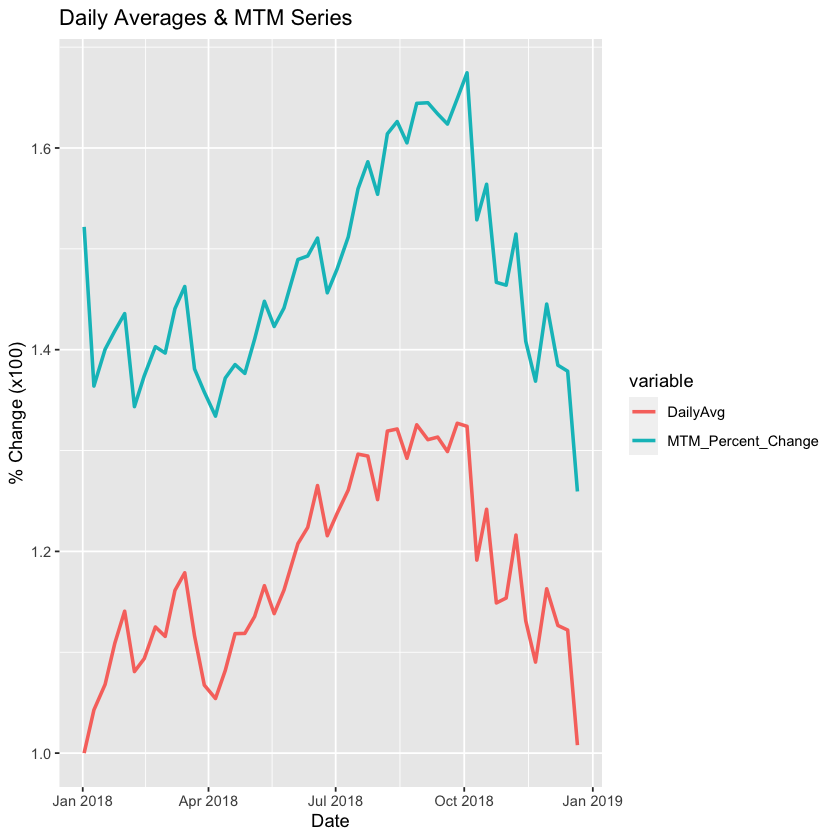

In [540]:
#install.packages("tidyverse")
library("tidyverse")

#HT Index and converted MTM
allMTM2 <- mutate(allMTM, MTM_Percent_Change = as.numeric(TotalMTM)/5000000)
CloCol <- select(tradingDays, ends_with("_Close"))
Avgtab <- mutate(CloCol, DailyAvg = rowMeans(CloCol)/rowMeans(CloCol[1,])) #calculate averages of each row
tradingDays["DATE"] <- as.Date(tradingDays$DATE) #the date column is factor instead of date before converting it here

#Graphs
data.frame(Date=tradingDays$DATE, HT_Index=Avgtab["DailyAvg"], MTM_Series=allMTM2["MTM_Percent_Change"]) %>% 
reshape2::melt(id.vars="Date") %>% 
ggplot(aes(x=Date, y=value, group=variable, color=variable)) + geom_line(size=1) +
labs(title="Daily Averages & MTM Series", y="% Change (x100)")

# 8.
Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

Warning message:
“attributes are not identical across measure variables; they will be dropped”

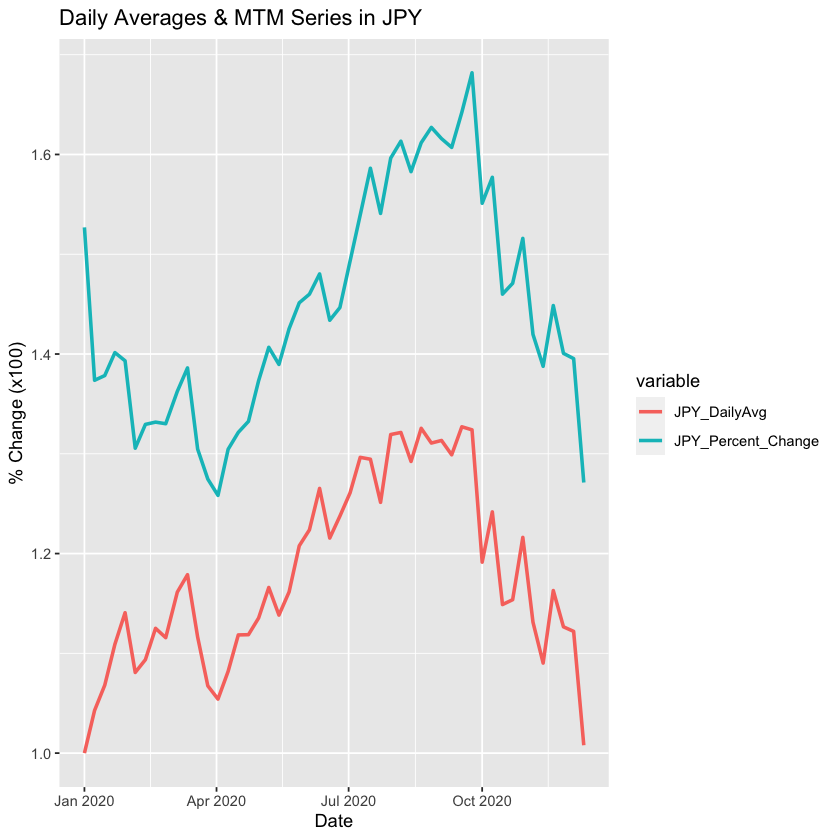

In [542]:
USJP=read.table("USD-JPY.csv", header=T, sep=",")
USJP["Date"]<- as.Date(USJP$Date,format="%m/%d/%y")
USJP2 <- USJP[seq(1,length(universe[,1]),5),]

allMTM3 <- cbind(allMTM2, USJP2[5])
allMTM3 <- mutate(allMTM3, TotalMTM_JPY = as.numeric(TotalMTM)*Close)
allMTM3 <- mutate(allMTM3, JPY_Percent_Change= TotalMTM_JPY/561450000) #JPY Close for 1/2/18 * 5,000,000
#str(allMTM3)
#CloCol <- select(tradingDays, ends_with("_Close"))

Avgtab <-  cbind(Avgtab, USJP2[5])
Avgtab <- mutate(Avgtab, JPY_DailyAvg = ((rowMeans(CloCol)*Close)/(rowMeans(CloCol[1,])*Close)))


data.frame(Date=USJP2$Date, HT_Index=Avgtab["JPY_DailyAvg"], MTM_Series=allMTM3["JPY_Percent_Change"]) %>% 
reshape2::melt(id.vars="Date") %>% 
ggplot(aes(x=Date, y=value, group=variable, color=variable)) + geom_line(size=1) +
labs(title="Daily Averages & MTM Series in JPY", y="% Change (x100)")

# 9
The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018.

In [550]:
#final results for 9 is  3 day rebalancing will bgive the best MTM

In [549]:
dayInterval = 3  #Tweakable value for how often you want to update the portfolio

## Universe with closing date daily amounts for all stocks
print("################################## Universe Closing Table ########################################")
head(Universe_closings,5)


#create table to get daily change %
print("################################## Change Table ########################################")
daily_change=Universe_closings%>%
            mutate(IBM_Adj_Close_Chg=round(IBM_ADJ_Close/lag(IBM_ADJ_Close),2))%>%
            mutate(MSFT_Adj_Close_Chg=round(MSFT_ADJ_Close/lag(MSFT_ADJ_Close),2))%>%
            mutate(GOOG_Adj_Close_Chg=round(GOOG_ADJ_Close/lag(GOOG_ADJ_Close),2))%>%
            mutate(AAPL_Adj_Close_Chg=round(AAPL_ADJ_Close/lag(AAPL_ADJ_Close),2))%>%
            mutate(AMZN_Adj_Close_Chg=round(AMZN_ADJ_Close/lag(AMZN_ADJ_Close),2))%>%
            mutate(FB_Adj_Close_Chg=round(FB_ADJ_Close/lag(FB_ADJ_Close),2))%>%
            mutate(NFLX_Adj_Close_Chg=round(NFLX_ADJ_Close/lag(NFLX_ADJ_Close),2))%>%
            mutate(TSLA_Adj_Close_Chg=round(TSLA_ADJ_Close/lag(TSLA_ADJ_Close),2))%>%
            mutate(ORCL_Adj_Close_Chg=round(ORCL_ADJ_Close/lag(ORCL_ADJ_Close),2))%>%
            mutate(SAP_Adj_Close_Chg=round(SAP_ADJ_Close/lag(SAP_ADJ_Close),2))%>%
            select(DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,
                   AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,
                   NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,
                   SAP_Adj_Close_Chg
                  )
head(daily_change,5)


#create table get daily dividends
print("################################## Dividends Table ########################################")
dividend_t=div_TBL2
#dividend_t

#create table with trading dates
print("################################## Trading Days Table ########################################")

trading_Days= Universe_closings[seq(1,length(universe[,1]),dayInterval),]
#trading_Days= rbind(trading_Days, tail(Universe_closings,1))
head(trading_Days,2)

#max_daily_change

buy_Portfolio =Portfolio
######################
#create Loop
######################
allMTM = data.frame()
for (n in 1:50){
    
#BuyFunction

current_date1=trading_Days[n,1]
selling_date =filter(Universe_closings,(DATE==current_date1))
dividend_t1 =filter(dividend_t,(DATE==current_date1))

#dividend_t
#Dividend Function
#DIV_stock_f = c()
for (i in 1:5){
DIV_stock_f[i]= switch(buy_Portfolio[i,1],
                    "IBM"= dividend_t1[1,i+1]
                    ,"MSFT"=dividend_t1[1,i+2]
                    ,"GOOG"=dividend_t1[1,i+3]
                    ,"AAPL"=dividend_t1[1,i+4]
                    ,"AMZN"=dividend_t1[1,i+5]
                    ,"FB"=dividend_t1[1,i+6]
                    ,"NFLX"=dividend_t1[1,i+7]
                    ,"TSLA"=dividend_t1[1,i+8]
                    ,"ORCL"=dividend_t1[1,i+9]
                    ,"SAP" =dividend_t1[1,i+10]
                   )

   d_Portfolio=Portfolio
   DIV_stock_f[i]
}
#
    

d_Portfolio[8]=DIV_stock_f[]
names(d_Portfolio)[8]="Dividends"
d_Portfolio = d_Portfolio %>%
             mutate(DATE=current_date1)
              
#d_Portfolio
selling_date
###### Sell stocks###
#Sell = c()
for (j in 1:5){
Sell[j] = switch(d_Portfolio[j,1],
                         "IBM"= d_Portfolio[j,4]*selling_date[1,j+1]## Shares * Closing value
                         ,"MSFT"=d_Portfolio[j,4]*selling_date[1,j+2]
                         ,"GOOG"= d_Portfolio[j,4]*selling_date[1,j+3]
                         ,"AAPL"=d_Portfolio[j,4]*selling_date[1,j+4]
                         ,"AMZN"=d_Portfolio[j,4]*selling_date[1,j+5]
                         ,"FB"=d_Portfolio[j,4]*selling_date[1,j+6] 
                         ,"NFLX"=d_Portfolio[j,4]*selling_date[1,j+7]
                         ,"TSLA"=d_Portfolio[j,4]*selling_date[1,j+8]
                         ,"ORCL"=d_Portfolio[j,4]*selling_date[1,j+9]
                         ,"SAP" =d_Portfolio[j,4]*selling_date[1,j+10]
      
                )
    # print(j) 
 Sell_Portfolio = d_Portfolio 
  
    Sell[j]
      }

#Sell[]
Sell_Portfolio[9]=Sell[]

#selling_date[8]

names(Sell_Portfolio)[9]="Dollar_Value"
Sell_Portfolio = Sell_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(Sale_value=Dollar_Value+(Dividends*Close)+Zero_Int_Cash)
              
Sell_Portfolio
print('$$$$$$ Cash Value after stock Sale $$$$$')
print(sum(Sell_Portfolio[11]))
print(current_date1)    

print('$$$$$$ Amount to Spend per Stock $$$$$')
Stipend=sum(Sell_Portfolio[11])/5
print(Stipend)
#selling_date

############################Find and Buy New Stocks ########################
#find lowest stocks to buy

Adividend_t=filter(daily_change,(DATE==current_date1))
##ADJ_Change_div
Adividend_t

#tobuy3 is unordered and used for graph    
tobuy3=rbind(Adividend_t %>%
          transmute(STOCK="IBM",
          Percent_Change=Adividend_t[1,2]),
          Adividend_t %>%
          transmute(STOCK="MSFT",        
          Percent_Change=Adividend_t[1,3]),
           Adividend_t %>%
          transmute(STOCK="GOOG",        
          Percent_Change=Adividend_t[1,4]), 
            Adividend_t %>%
          transmute(STOCK="AAPL",        
          Percent_Change=Adividend_t[1,5]),
          Adividend_t %>%
          transmute(STOCK="AMZN",        
          Percent_Change=Adividend_t[1,6]),
          Adividend_t %>%
          transmute(STOCK="FB",        
          Percent_Change=Adividend_t[1,7]),  
          Adividend_t %>%
          transmute(STOCK="NFLX",        
          Percent_Change=Adividend_t[1,8]),
          Adividend_t %>%
          transmute(STOCK="TSLA",        
          Percent_Change=Adividend_t[1,9]) ,
          Adividend_t %>%
          transmute(STOCK="ORCL",        
          Percent_Change=Adividend_t[1,10]) ,
          Adividend_t %>%
          transmute(STOCK="SAP",        
          Percent_Change=Adividend_t[1,11]) 
                   )

tobuy2=tobuy[order(tobuy$Percent_Change),]


tobuy2

selling_date
#buy lowest Stocks

for(l in 1:5){
    Buy_stock1[l] = switch(tobuy2[l,1],
                    "IBM"= selling_date[1,2]
                    ,"MSFT"=selling_date[1,4]
                    ,"GOOG"=selling_date[1,6]
                    ,"AAPL"=selling_date[1,8]
                    ,"AMZN"=selling_date[1,10]
                    ,"FB"=selling_date[1,12]
                    ,"NFLX"=selling_date[1,14]
                    ,"TSLA"=selling_date[1,16]
                    ,"ORCL"=selling_date[1,18]
                    ,"SAP" =selling_date[1,20]
                  #  ,"SAP" =
                   )
    
  buy_Portfolio = tobuy2
  
}

buy_Portfolio=buy_Portfolio[1:5,]
buy_Portfolio[3]=Buy_stock1[]
names(buy_Portfolio)[3]="Close"
buy_Portfolio = buy_Portfolio %>%
             mutate(DATE=current_date1)%>%
             mutate(No_of_Shares=floor(Stipend/Close))%>%
             mutate(Cost = round(No_of_Shares * Close))%>%
             mutate(Zero_Int_Cash=Stipend-Cost) %>%
             mutate(MTM=format(Cost+Zero_Int_Cash,scientific=6))
buy_Portfolio
Portfolio

### New Portfolio and MTM as of rebalance data
re_Balance4=unique(buy_Portfolio %>%
  transmute(
            "Total Stock Investments"= sum(Cost),
            "Total Cash available for trading" =sum(Zero_Int_Cash),
            "TotalMTM"= format(sum(Cost)+sum(Zero_Int_Cash) ,scientific=2),
             "REBALANCE Purchase Date"=current_date1
           ))

re_Balance4
allMTM = rbind(allMTM,re_Balance4) #creates df with all values
   }     
buy_Portfolio
re_Balance4
#allMTM

[1] "################################## Universe Closing Table ########################################"


DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
2018-01-03,158.49,141.3013,86.35,83.18433,1082.48,1082.48,172.23,166.3247,1204.20,...,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.74577,108.5147,113.31
2018-01-04,161.70,144.1631,87.11,83.91647,1086.40,1086.40,173.03,167.0973,1209.59,...,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.19643,110.1811,115.05
2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,111.4069,116.33
2018-01-08,163.47,145.7412,88.28,85.04357,1106.94,1106.94,174.35,168.3720,1246.87,...,188.28,188.28,212.05,212.05,336.41,336.41,48.98,46.96349,109.9416,114.80


[1] "################################## Change Table ########################################"


DATE,IBM_Adj_Close_Chg,MSFT_Adj_Close_Chg,GOOG_Adj_Close_Chg,AAPL_Adj_Close_Chg,AMZN_Adj_Close_Chg,FB_Adj_Close_Chg,NFLX_Adj_Close_Chg,TSLA_Adj_Close_Chg,ORCL_Adj_Close_Chg,SAP_Adj_Close_Chg
2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,1.03,1.00,1.02,1.00,1.01,1.02,1.02,0.99,1.02,1.01
2018-01-04,1.02,1.01,1.00,1.00,1.00,1.00,1.00,0.99,1.01,1.02
2018-01-05,1.00,1.01,1.01,1.01,1.02,1.01,1.02,1.01,1.01,1.01
2018-01-08,1.01,1.00,1.00,1.00,1.01,1.01,1.01,1.06,1.01,0.99


[1] "################################## Dividends Table ########################################"
[1] "################################## Trading Days Table ########################################"


,DATE,IBM_Close,IBM_ADJ_Close,MSFT_Close,MSFT_ADJ_Close,GOOG_Close,GOOG_ADJ_Close,AAPL_Close,AAPL_ADJ_Close,AMZN_Close,...,FB_Close,FB_ADJ_Close,NFLX_Close,NFLX_ADJ_Close,TSLA_Close,TSLA_ADJ_Close,ORCL_Close,ORCL_ADJ_Close,SAP_Close,SAP_ADJ_Close
1,2018-01-02,154.25,137.5211,85.95,82.79900,1065.00,1065.00,172.26,166.3537,1189.01,...,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.71024,107.6336,112.39
4,2018-01-05,162.49,144.8675,88.19,84.95689,1102.23,1102.23,175.00,168.9997,1229.14,...,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.47449,111.4069,116.33


[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 7608824
[1] 2018-01-02
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1521765
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6783242
[1] 2018-01-05
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1356648
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6811469
[1] 2018-01-10
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1362294
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6918259
[1] 2018-01-16
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1] 1383652
[1] "$$$$$$ Cash Value after stock Sale $$$$$"
[1] 6964690
[1] 2018-01-19
250 Levels: 2018-01-02 2018-01-03 2018-01-04 2018-01-05 ... 2018-12-28
[1] "$$$$$$ Amount to Spend per Stock $$$$$"
[1

STOCK,Percent_Change,Close,DATE,No_of_Shares,Cost,Zero_Int_Cash,MTM
IBM,0.99,142.96,2018-08-02,11148,1593718,142.682803,1593861
MSFT,0.99,107.57,2018-08-02,14816,1593757,103.682803,1593861
GOOG,0.99,1226.15,2018-08-02,1299,1592769,1091.682803,1593861
FB,0.99,176.37,2018-08-02,9037,1593856,4.682803,1593861
AAPL,1.00,207.39,2018-08-02,7685,1593792,68.682803,1593861


Total Stock Investments,Total Cash available for trading,TotalMTM,REBALANCE Purchase Date
7967892,1411.414,7969303,2018-08-02
